<a href="https://colab.research.google.com/github/afclopes/Gene_Onthologies_Work_Public/blob/main/OnlineData_Lozoya_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lozoya Paper Data Analysis

Here we will look into depth at a dataset already published under the GEO accession number GSE100134.
The data came from the paper *Mitochondrial nicotinamide adenine dinucleotide reduced (NADH) oxidation links the tricarboxylic acid (TCA) cycle with methionine metabolism and nuclear DNA methylation* by the authors Oswaldo A. Lozoya, Inmaculada Martinez-Reyes, Tianyuan Wang, Dagoberto Grenet, Pierre Bushel, Jianying Li, Navdeep Chandel, Richard P. Woychik, Janine H. Santos, which was published in PLOS Biology in April 2018.

The paper focused mostly on RNA-seq data, hence differentially expressed genes (DEGs), and DNA methylation, of POLG-/- mutant mice exposed to doxycyclin over a span of different days. These results were compared to DNA methylation levels of isogenic cells that ectopically express 2 nonmammalian proteins—NADH dehydrogenase-like 1 (NDI1) and alternative oxidase (AOX).

But this manuscript also published data on Rho0 cells and its DNA methylation. However this was not exploited in their paper. The plan is to start investigating this in more depth.

In [3]:
#let's start by installing packages we will likely be using
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

*In colab we need to upload our data file before we can start working with it:*

In [4]:
from google.colab import files
uploaded = files.upload()

Saving journal.pbio.2005707.s012_MitoNADH_OALozoya2018.csv to journal.pbio.2005707.s012_MitoNADH_OALozoya2018.csv


In [5]:
import io
lozoya_data=pd.read_csv(io.BytesIO(uploaded['journal.pbio.2005707.s012_MitoNADH_OALozoya2018.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
lozoya_data.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23
2,cg19620994,AADACL3,TSS1500,chr1,12774904,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.08,2.92,16.55,0.000750,0.011350,-1.72,0.19,1.24,0.000838,0.033800,47.60,55.93,51.96,25.21,21.68,27.35,-0.14,0.34,0.11,-1.57,-1.85,-1.41
3,cg13806966,ABCA2,TSS1500,chr9,139923567,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-26.59,2.28,16.55,0.000311,0.005897,-2.17,0.21,1.24,0.000493,0.005825,35.80,42.06,39.99,12.61,10.40,15.08,-0.84,-0.46,-0.59,-2.79,-3.11,-2.49
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12


In [7]:
mpl.style.use('ggplot')

Let's separate the graphing into questions that we want to address.

# To which degree are different genes methylated? And what is the frequency of this methylation?

In [8]:
methylation = lozoya_data.loc[:,'Δ%mCG']

In [9]:
methylation.head()

0    29.19
1    19.10
2   -27.08
3   -26.59
4    38.57
Name: Δ%mCG, dtype: float64

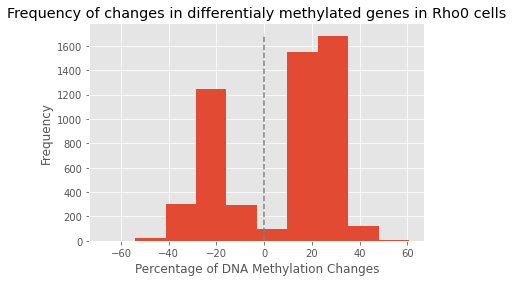

In [10]:
methylation.plot(kind='hist')
plt.title('Frequency of changes in differentialy methylated genes in Rho0 cells')
plt.xlabel('Percentage of DNA Methylation Changes')
plt.vlines(0,0,1700,linestyles='dashed', colors='grey')
plt.show()

# Which gene regions are methylated or demethylated?

In [11]:
lozoya_data_frame=pd.DataFrame(lozoya_data)

In [13]:
lozoya_data_frame.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23
2,cg19620994,AADACL3,TSS1500,chr1,12774904,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.08,2.92,16.55,0.000750,0.011350,-1.72,0.19,1.24,0.000838,0.033800,47.60,55.93,51.96,25.21,21.68,27.35,-0.14,0.34,0.11,-1.57,-1.85,-1.41
3,cg13806966,ABCA2,TSS1500,chr9,139923567,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-26.59,2.28,16.55,0.000311,0.005897,-2.17,0.21,1.24,0.000493,0.005825,35.80,42.06,39.99,12.61,10.40,15.08,-0.84,-0.46,-0.59,-2.79,-3.11,-2.49
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12


In [14]:
Methy=lozoya_data_frame[lozoya_data_frame['DMG Change']=='ρ0 Meth']

In [15]:
Methy.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12
7,cg06258593,ABCC11,IGR,chr16,48199609,q,open sea,IGR - open sea,-1213.0,ρ0 v. ρ+,ρ0 Meth,22.27,1.50,16.55,0.000121,0.009532,1.33,0.10,1.24,0.000176,0.208550,35.15,32.79,29.97,54.99,55.12,54.62,-0.88,-1.04,-1.22,0.29,0.30,0.27
8,cg20025970,ABCC9,1stExon,chr12,22089560,p,open sea,1stExon - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,40.08,2.78,16.55,0.000134,0.000549,3.03,0.18,1.24,0.000078,0.000318,52.74,48.55,43.44,88.83,86.95,89.19,0.16,-0.08,-0.38,2.99,2.74,3.04


In [16]:
Demethy=lozoya_data_frame[lozoya_data_frame['DMG Change']=='ρ0 Demeth']

[Text(0, 0.5, 'Percentage of DNA Methylation Changes'),
 Text(0.5, 0, 'Gene region'),
 Text(0.5, 1.0, 'Gene regions of differentialy methylated genes in Rho0 cells')]

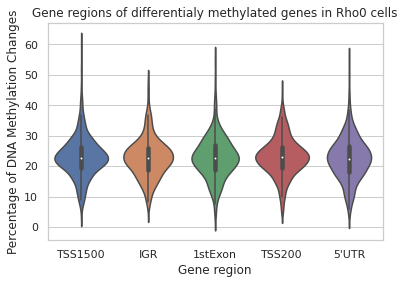

In [17]:
sns.set(style='whitegrid')
graph=sns.violinplot(x='feature.1',y='Δ%mCG',data=Methy)
graph.set(title='Gene regions of differentialy methylated genes in Rho0 cells',xlabel='Gene region',ylabel='Percentage of DNA Methylation Changes')


[Text(0, 0.5, 'Percentage of DNA Methylation Changes'),
 Text(0.5, 0, 'Gene region'),
 Text(0.5, 1.0, 'Gene regions of differentialy demethylated genes in Rho0 cells')]

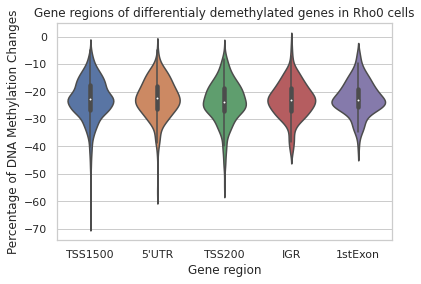

In [18]:
sns.set(style='whitegrid')
graph=sns.violinplot(x='feature.1',y='Δ%mCG',data=Demethy)
graph.set(title='Gene regions of differentialy demethylated genes in Rho0 cells',xlabel='Gene region',ylabel='Percentage of DNA Methylation Changes')


## Can these plots of gene regions be organised according to the structure of the gene?


[Text(0, 0.5, 'Percentage of DNA Methylation Changes'),
 Text(0.5, 0, 'Gene region'),
 Text(0.5, 1.0, 'Gene regions of differentialy demethylated genes in Rho0 cells')]

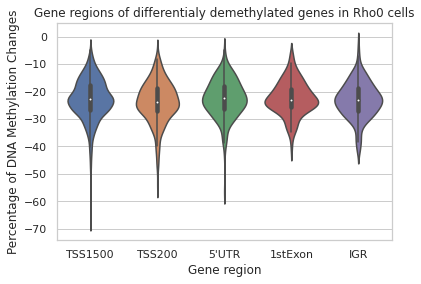

In [19]:
sns.set(style='whitegrid')
graph=sns.violinplot(x='feature.1',y='Δ%mCG',data=Demethy, order=["TSS1500","TSS200","5'UTR","1stExon","IGR"])
graph.set(title='Gene regions of differentialy demethylated genes in Rho0 cells',xlabel='Gene region',ylabel='Percentage of DNA Methylation Changes')


[Text(0, 0.5, 'Percentage of DNA Methylation Changes'),
 Text(0.5, 0, 'Gene region'),
 Text(0.5, 1.0, 'Gene regions of differentialy methylated genes in Rho0 cells')]

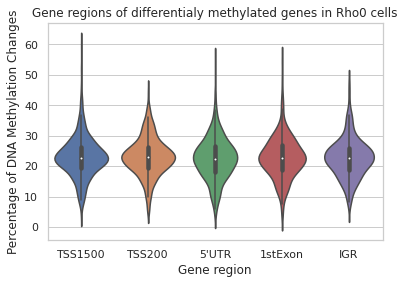

In [20]:
sns.set(style='whitegrid')
graph=sns.violinplot(x='feature.1',y='Δ%mCG',data=Methy, order=["TSS1500","TSS200","5'UTR","1stExon","IGR"])
graph.set(title='Gene regions of differentialy methylated genes in Rho0 cells',xlabel='Gene region',ylabel='Percentage of DNA Methylation Changes')


# Which CpG regions have the most differential methylation?

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'CpG region'),
 Text(0.5, 1.0, 'CpG regions of differentialy methylated genes in Rho0 cells')]

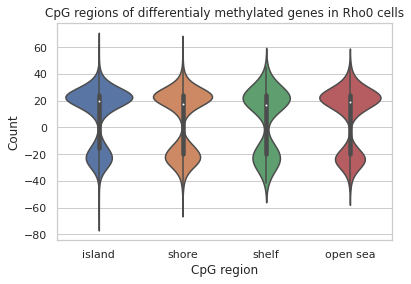

In [21]:
sns.set(style='whitegrid')
graph=sns.violinplot(x='cgi',y='Δ%mCG',data=lozoya_data_frame, order=["island","shore","shelf","open sea"])
graph.set(title='CpG regions of differentialy methylated genes in Rho0 cells',xlabel='CpG region',ylabel='Count')


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'CpG region'),
 Text(0.5, 1.0, 'CpG regions of differentialy methylated genes in Rho0 cells')]

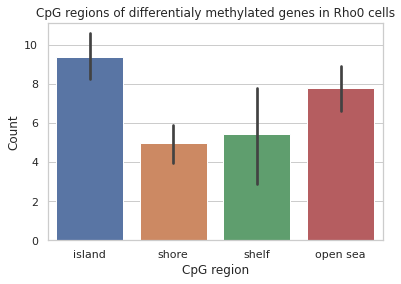

In [22]:
sns.set(style='whitegrid')
graph=sns.barplot(x='cgi',y='Δ%mCG',data=lozoya_data_frame, order=["island","shore","shelf","open sea"])
graph.set(title='CpG regions of differentialy methylated genes in Rho0 cells',xlabel='CpG region',ylabel='Count')


## Do the  CpG regions with most differentiated methylation look different when comparing methylated with demethylated?

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'CpG region'),
 Text(0.5, 1.0, 'CpG regions of differentialy methylated genes in Rho0 cells')]

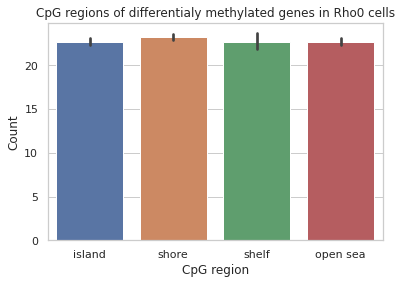

In [23]:
sns.set(style='whitegrid')
graph=sns.barplot(x='cgi',y='Δ%mCG',data=Methy, order=["island","shore","shelf","open sea"])
graph.set(title='CpG regions of differentialy methylated genes in Rho0 cells',xlabel='CpG region',ylabel='Count')


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'CpG region'),
 Text(0.5, 1.0, 'CpG regions of differentialy methylated genes in Rho0 cells')]

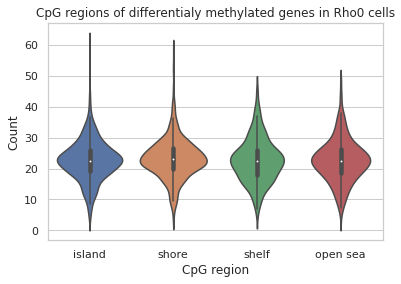

In [24]:
# same data but plotted differently
sns.set(style='whitegrid')
graph=sns.violinplot(x='cgi',y='Δ%mCG',data=Methy, order=["island","shore","shelf","open sea"])
graph.set(title='CpG regions of differentialy methylated genes in Rho0 cells',xlabel='CpG region',ylabel='Count')


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'CpG region'),
 Text(0.5, 1.0, 'CpG regions of differentialy demethylated genes in Rho0 cells')]

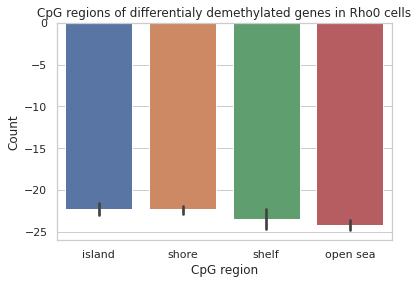

In [25]:
sns.set(style='whitegrid')
graph=sns.barplot(x='cgi',y='Δ%mCG',data=Demethy, order=["island","shore","shelf","open sea"])
graph.set(title='CpG regions of differentialy demethylated genes in Rho0 cells',xlabel='CpG region',ylabel='Count')


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'CpG region'),
 Text(0.5, 1.0, 'CpG regions of differentialy demethylated genes in Rho0 cells')]

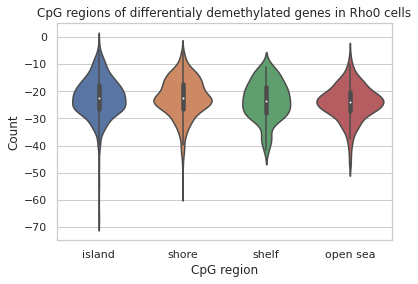

In [26]:
#same plot but potted differently
sns.set(style='whitegrid')
graph=sns.violinplot(x='cgi',y='Δ%mCG',data=Demethy, order=["island","shore","shelf","open sea"])
graph.set(title='CpG regions of differentialy demethylated genes in Rho0 cells',xlabel='CpG region',ylabel='Count')


The methylated and demethylated data when aggregated paints a different picture, which doesn't seem to be true when we break down these categories.

# Which gene areas are found in the different gene regions?

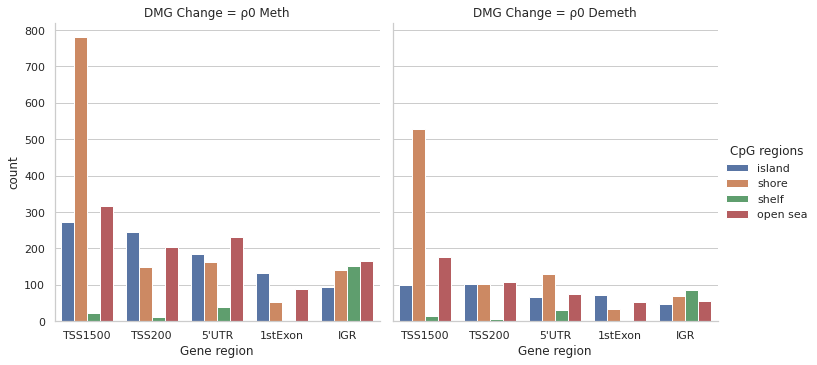

In [27]:

graph=sns.catplot(hue='cgi',x='feature.1',kind='count',data=lozoya_data_frame,col='DMG Change',legend=False,hue_order=["island","shore","shelf","open sea"],order=["TSS1500","TSS200","5'UTR","1stExon","IGR"])
graph.set(xlabel='Gene region')
graph.add_legend(title='CpG regions')

# What are the genes most differentially methylated?

Ways to approach this question are:
1. plot differential methylation versus genes
2. create a manhattan plot of the chromosomes versus p-values of methylation
3. make a volcano plot of the p-values versus fold-change

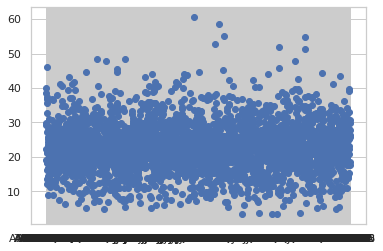

In [28]:
plt.scatter(x='gene.1',y='Δ%mCG',data=Methy)

This looks super messy and difficult to read. So let's find other ways to look at this data.

In [29]:
!pip install bioinfokit 

     |████████████████████████████████| 81kB 5.3MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-1.0.7-cp36-none-any.whl size=55616 sha256=de431a4955ebce8600b1984c4343a9e4b2d528eb7793494c8db279850edb8ea8
  Stored in directory: /root/.cache/pip/wheels/f6/30/5d/d4b0f14ae4b00b527e9aa715c54c393fc999897cb0a5673bf3
  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=838de18138810a1a181220ecadb031042334c692b8fa9163959d68ca329242ae
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [30]:
!pip show bioinfokit

Name: bioinfokit
Version: 1.0.7
Summary: Bioinformatics data analysis and visualization toolkit
Home-page: http://reneshbedre.github.io/
Author: Renesh Bedre
Author-email: reneshbe@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: adjustText, statsmodels, seaborn, scikit-learn, scipy, matplotlib, tabulate, matplotlib-venn, pandas, numpy, textwrap3
Required-by: 


In [31]:
from bioinfokit import analys, visuz

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


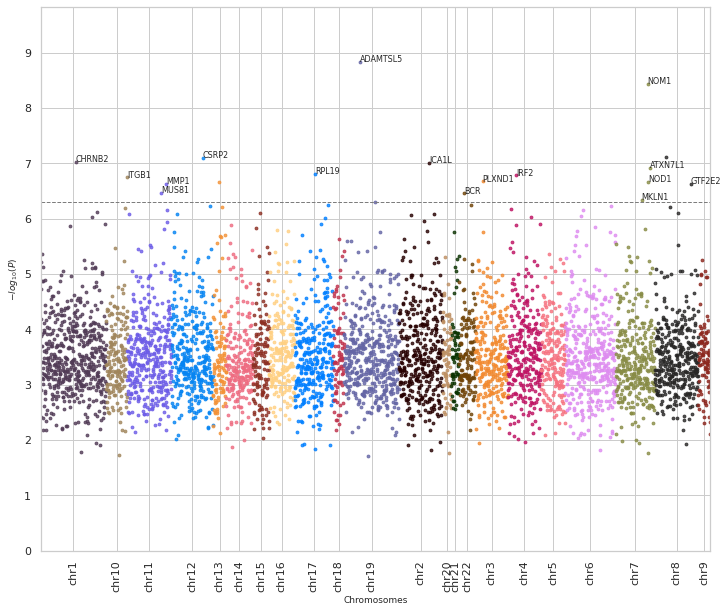

In [32]:
sorted_lozoya=lozoya_data_frame.sort_values(by=['ref'])
visuz.marker.mhat(df=sorted_lozoya,chr='ref',pv='Δ%mCG Plain Dif PValue',show=True,gwas_sign_line=True,markernames=True,markeridcol='gene.1',valpha=0.8,gwasp=5E-07,dim=(12,10))

I found it tricky to distinguish which one of the p-values in the table I should use, so I tried both (see top and bottom). The graph at the bottom seems to look the way that a manhattan plot should look like.

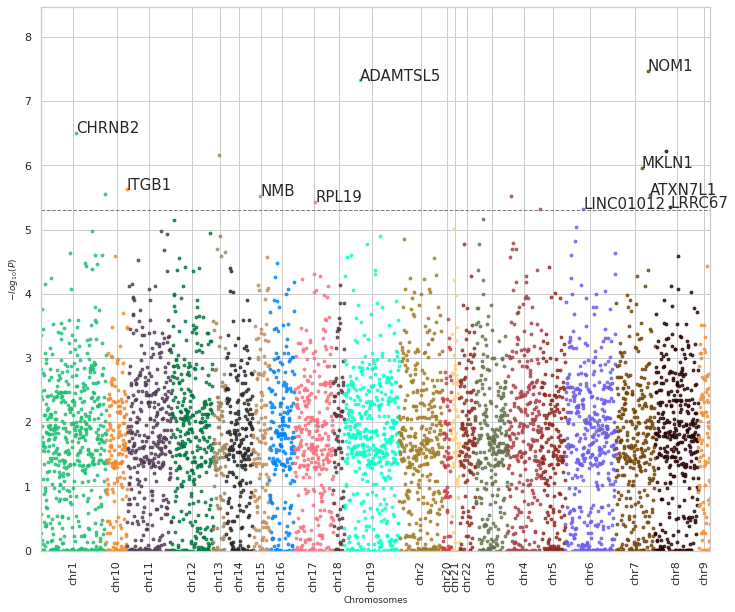

In [33]:
visuz.marker.mhat(df=sorted_lozoya,chr='ref',pv='Δ%mCG Practical Dif PValue',show=True,gwas_sign_line=True,markernames=True,markeridcol='gene.1',valpha=0.8,gwasp=5E-06,dim=(12,10),gfont=15)

**can I change the order of the chromosomes? And does it matter?**

Volcano plots are supposed to "visualize and identify statistically significant gene expression changes from two different conditions (eg. normal vs. treated) in terms of log fold change (X-axis) and P-value (Y-axis)". So I went on to calculate the log 2 of the fold change.

In [34]:
import math

In [35]:
lozoya_data_frame['Log2Δ%mCG']= np.log2(lozoya_data_frame['Δ%mCG'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
lozoya_data_frame.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97,4.867402
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23,4.255501
2,cg19620994,AADACL3,TSS1500,chr1,12774904,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.08,2.92,16.55,0.000750,0.011350,-1.72,0.19,1.24,0.000838,0.033800,47.60,55.93,51.96,25.21,21.68,27.35,-0.14,0.34,0.11,-1.57,-1.85,-1.41,NaN
3,cg13806966,ABCA2,TSS1500,chr9,139923567,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-26.59,2.28,16.55,0.000311,0.005897,-2.17,0.21,1.24,0.000493,0.005825,35.80,42.06,39.99,12.61,10.40,15.08,-0.84,-0.46,-0.59,-2.79,-3.11,-2.49,NaN
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12,5.269407


In [41]:
lozoya_data_frame2=lozoya_data_frame.dropna()

In [43]:
visuz.gene_exp.volcano(df=lozoya_data_frame2,lfc='Log2Δ%mCG',pv='Δ%mCG Practical Dif PValue',show=True)

AssertionError: ignored

I am unsure why this graph came out one sided. I believe it is to do with how they calculated the M-value and how I calculated it.


According to this paper: https://www.sciencedirect.com/science/article/pii/S2213596014001172 " M-value is more statistically applicable for differential analysis of methylation levels and also satisfies homoscedasticity. β-Value was transformed to M-value as the log2 ratio of the intensities of methylated probe versus unmethylated probe". Therefore I decided to try plotting the M-value that is already available in the table:

In [49]:
#visuz.gene_exp.volcano(df=lozoya_data_frame2,lfc='M-value = LogOdds(%mCG)',pv='Δ%mCG Practical Dif PValue',show=True,color=("blue","blue"),geneid='gene.1',genenames='deg',lfc_thr=1.5,pv_thr=0.000005,dim=(12,10),gfont=15,sign_line=True)

visuz.gene_exp.volcano(df=lozoya_data_frame2,lfc='M-value = LogOdds(%mCG)',pv='Δ%mCG Practical Dif PValue',show=True,color=(1,2,3),geneid='gene.1',genenames='deg',lfc_thr=1.5,pv_thr=0.000005,dim=(12,10),gfont=15,sign_line=True)

#"#00239CFF", "grey", "#E10600FF"

TypeError: ignored

Some papers (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4622425/) seem to make volcano plots of methylation change using delta beta, versus log10 of the p-value, so I decided to give this a go too. 

In [48]:
visuz.gene_exp.volcano(df=lozoya_data_frame2,lfc='Δ%mCG',pv='Δ%mCG Practical Dif PValue',show=True,dim=(12,10),lfc_thr=25,pv_thr=0.000005,sign_line=True,geneid='gene.1',genenames='deg',gfont=15,color=('red','red'),axxlabel='Methylation Change (delta beta)')

AssertionError: ignored

Seems like the same set of genes come up in all of these plots, which makes sense since they all are looking at log10 of the p-value.

## Can a list of most differentially methylated genes be created?

In [51]:
lozoya_data_frame.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97,4.867402
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23,4.255501
2,cg19620994,AADACL3,TSS1500,chr1,12774904,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.08,2.92,16.55,0.000750,0.011350,-1.72,0.19,1.24,0.000838,0.033800,47.60,55.93,51.96,25.21,21.68,27.35,-0.14,0.34,0.11,-1.57,-1.85,-1.41,NaN
3,cg13806966,ABCA2,TSS1500,chr9,139923567,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-26.59,2.28,16.55,0.000311,0.005897,-2.17,0.21,1.24,0.000493,0.005825,35.80,42.06,39.99,12.61,10.40,15.08,-0.84,-0.46,-0.59,-2.79,-3.11,-2.49,NaN
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12,5.269407


In [52]:
#made a new column with what I was plotting before...
lozoya_data_frame['Log10Δ%mCG Practical Dif PValue']= np.log10(lozoya_data_frame['Δ%mCG Practical Dif PValue'])
lozoya_data_frame.head()
#but then realised that this was not necessary, what is necessary is the p-value of the size that I want
#the log10 is used to make the visualisation easier

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG,Log10Δ%mCG Practical Dif PValue
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97,4.867402,-2.057253
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23,4.255501,-1.670494
2,cg19620994,AADACL3,TSS1500,chr1,12774904,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.08,2.92,16.55,0.000750,0.011350,-1.72,0.19,1.24,0.000838,0.033800,47.60,55.93,51.96,25.21,21.68,27.35,-0.14,0.34,0.11,-1.57,-1.85,-1.41,NaN,-1.945007
3,cg13806966,ABCA2,TSS1500,chr9,139923567,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-26.59,2.28,16.55,0.000311,0.005897,-2.17,0.21,1.24,0.000493,0.005825,35.80,42.06,39.99,12.61,10.40,15.08,-0.84,-0.46,-0.59,-2.79,-3.11,-2.49,NaN,-2.229369
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12,5.269407,-3.798750


In [53]:
DiffMeth05E6 = lozoya_data_frame[lozoya_data_frame['Δ%mCG Practical Dif PValue']<=0.000005]


In [54]:
DiffMeth05E6.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG,Log10Δ%mCG Practical Dif PValue
62,cg09977969,ADAMTSL5,IGR,chr19,1503778,p,island,IGR - island,-1239.0,ρ0 v. ρ+,ρ0 Meth,25.60,0.10,16.55,1.476290e-09,4.737940e-08,1.89,0.01,1.24,4.293390e-09,1.543390e-07,16.28,16.32,16.04,41.88,41.71,41.84,-2.36,-2.36,-2.39,-0.47,-0.48,-0.48,4.678072,-7.324410
305,cg16114096,ATXN7L1,TSS1500,chr7,105517447,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,26.65,0.32,16.55,1.194790e-07,2.891010e-06,2.27,0.04,1.24,6.595870e-07,7.900080e-06,11.80,10.85,11.14,37.84,37.70,38.19,-2.90,-3.04,-3.00,-0.72,-0.72,-0.69,4.736064,-5.538950
388,cg09053907,BTC,TSS200,chr4,75720055,q,shore,TSS200 - shore,NaN,ρ0 v. ρ+,ρ0 Meth,39.37,0.72,16.55,6.603080e-07,2.994280e-06,2.47,0.06,1.24,1.489170e-06,1.220650e-05,24.05,23.26,21.93,62.80,62.82,61.72,-1.66,-1.72,-1.83,0.76,0.76,0.69,5.299025,-5.523708
907,cg13424529,CHRNB2,TSS1500,chr1,154539224,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-44.30,0.49,16.55,9.228790e-08,3.122710e-07,-2.80,0.04,1.24,1.775800e-07,9.448860e-07,77.33,78.51,77.86,33.46,34.27,33.07,1.77,1.87,1.81,-0.99,-0.94,-1.02,NaN,-6.505468
1295,cg17922851,DZIP1,TSS1500,chr13,96297224,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Meth,45.53,0.63,16.55,2.186240e-07,6.965290e-07,3.66,0.08,1.24,1.119060e-06,3.096060e-06,9.26,8.22,8.01,54.74,53.07,54.26,-3.29,-3.48,-3.52,0.27,0.18,0.25,5.508746,-6.157061


In [55]:
DiffMeth05E6.shape
#results seem so small...

(15, 35)

Perhaps I am being too stringent with my p-values. If I want to be able to compare later on with other data sets, I need to relax my p-values. Let's try with 0.001 to assume high significance.

In [56]:
DiffMeth01E3 = lozoya_data_frame[lozoya_data_frame['Δ%mCG Practical Dif PValue']<=0.001]

In [57]:
lozoya_data_frame.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG,Log10Δ%mCG Practical Dif PValue
0,cg00134295,A2M,TSS1500,chr12,9269178,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,29.19,3.23,16.55,0.000833,0.008765,2.06,0.23,1.24,0.000805,0.011409,58.23,53.33,48.38,82.77,85.03,79.72,0.48,0.19,-0.09,2.26,2.51,1.97,4.867402,-2.057253
1,cg15769388,A2ML1,TSS1500,chr12,8974844,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,19.10,0.87,16.55,0.000025,0.021355,1.21,0.06,1.24,0.000029,0.714191,28.32,26.47,26.64,47.44,45.26,46.03,-1.34,-1.47,-1.46,-0.15,-0.27,-0.23,4.255501,-1.670494
2,cg19620994,AADACL3,TSS1500,chr1,12774904,p,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.08,2.92,16.55,0.000750,0.011350,-1.72,0.19,1.24,0.000838,0.033800,47.60,55.93,51.96,25.21,21.68,27.35,-0.14,0.34,0.11,-1.57,-1.85,-1.41,NaN,-1.945007
3,cg13806966,ABCA2,TSS1500,chr9,139923567,q,shore,TSS1500 - shore,NaN,ρ0 v. ρ+,ρ0 Demeth,-26.59,2.28,16.55,0.000311,0.005897,-2.17,0.21,1.24,0.000493,0.005825,35.80,42.06,39.99,12.61,10.40,15.08,-0.84,-0.46,-0.59,-2.79,-3.11,-2.49,NaN,-2.229369
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12,5.269407,-3.798750


In [58]:
DiffMeth01E3.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG,Log10Δ%mCG Practical Dif PValue
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12,5.269407,-3.798750
8,cg20025970,ABCC9,1stExon,chr12,22089560,p,open sea,1stExon - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,40.08,2.78,16.55,0.000134,0.000549,3.03,0.18,1.24,0.000078,0.000318,52.74,48.55,43.44,88.83,86.95,89.19,0.16,-0.08,-0.38,2.99,2.74,3.04,5.324811,-3.260430
10,cg06030219,ABCG1,TSS1500,chr21,43639122,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,36.67,0.85,16.55,0.000002,0.000010,3.20,0.08,1.24,0.000002,0.000008,8.16,8.71,7.57,45.90,43.29,45.27,-3.49,-3.39,-3.61,-0.24,-0.39,-0.27,5.196528,-5.012753
11,cg26768067,ABCG1,TSS1500,chr21,43639119,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,35.65,2.57,16.55,0.000156,0.000887,2.66,0.29,1.24,0.000812,0.004276,18.71,10.81,11.60,48.60,49.11,50.37,-2.12,-3.04,-2.93,-0.08,-0.05,0.02,5.155830,-3.052189
12,cg02473680,ABCG1,TSS1500,chr21,43639067,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,32.62,2.17,16.55,0.000113,0.000893,2.10,0.19,1.24,0.000369,0.005177,24.69,23.78,17.80,54.45,54.68,55.00,-1.61,-1.68,-2.21,0.26,0.27,0.29,5.027685,-3.049361


I realised here that all this data has *Δ%mCG Practical Difference* as 16.55. I wonder why. It would be nice to get the raw that and prepare the table I am using from scratch.

In [59]:
DiffMeth01E3.shape

(556, 35)

In [60]:
lozoya_data_frame.shape

(5322, 35)

This has narrowed down  the findings by 10% of the original data. Next we shall save it into a list to be used later.

In [61]:
DiffMeth01E3.dtypes

probe                               object
gene.1                              object
feature.1                           object
ref                                 object
start                                int64
arm                                 object
cgi                                 object
feat.cgi                            object
distancetoGene                     float64
mCG Comparison                      object
DMG Change                          object
Δ%mCG                              float64
Δ%mCG Std Err Diff                 float64
Δ%mCG Practical Difference         float64
Δ%mCG Plain Dif PValue             float64
Δ%mCG Practical Dif PValue         float64
M-value = LogOdds(%mCG)            float64
M-value Std Err Diff               float64
M-value Practical Difference       float64
M-value Plain Dif PValue           float64
M-value Practical Dif PValue       float64
%mCG ρ+ Rep 1                      float64
%mCG ρ+ Rep 2                      float64
%mCG ρ+ Rep

In [62]:
DiffMeth01E3.to_csv('DiffMeth01E3.csv',index=False)

Next the idea is to use this table for Gene Ontology terms and Revigo plots.

 Can I do a Q-Q plot? And will a Q-Q plot be informative? 

In [63]:
Methy_DiffMeth01E3=DiffMeth01E3[DiffMeth01E3['DMG Change']=='ρ0 Meth']

In [64]:
Methy_DiffMeth01E3.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG,Log10Δ%mCG Practical Dif PValue
4,cg21346679,ABCB11,TSS1500,chr2,169888373,q,open sea,TSS1500 - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,38.57,1.89,16.55,0.000034,0.000159,2.62,0.14,1.24,0.000050,0.000313,42.59,47.69,43.50,83.38,84.87,81.25,-0.43,-0.13,-0.38,2.33,2.49,2.12,5.269407,-3.798750
8,cg20025970,ABCC9,1stExon,chr12,22089560,p,open sea,1stExon - open sea,NaN,ρ0 v. ρ+,ρ0 Meth,40.08,2.78,16.55,0.000134,0.000549,3.03,0.18,1.24,0.000078,0.000318,52.74,48.55,43.44,88.83,86.95,89.19,0.16,-0.08,-0.38,2.99,2.74,3.04,5.324811,-3.260430
10,cg06030219,ABCG1,TSS1500,chr21,43639122,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,36.67,0.85,16.55,0.000002,0.000010,3.20,0.08,1.24,0.000002,0.000008,8.16,8.71,7.57,45.90,43.29,45.27,-3.49,-3.39,-3.61,-0.24,-0.39,-0.27,5.196528,-5.012753
11,cg26768067,ABCG1,TSS1500,chr21,43639119,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,35.65,2.57,16.55,0.000156,0.000887,2.66,0.29,1.24,0.000812,0.004276,18.71,10.81,11.60,48.60,49.11,50.37,-2.12,-3.04,-2.93,-0.08,-0.05,0.02,5.155830,-3.052189
12,cg02473680,ABCG1,TSS1500,chr21,43639067,q,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Meth,32.62,2.17,16.55,0.000113,0.000893,2.10,0.19,1.24,0.000369,0.005177,24.69,23.78,17.80,54.45,54.68,55.00,-1.61,-1.68,-2.21,0.26,0.27,0.29,5.027685,-3.049361


In [65]:
Demethy_DiffMeth01E3=DiffMeth01E3[DiffMeth01E3['DMG Change']=='ρ0 Demeth']

In [66]:
Demethy_DiffMeth01E3.head()

,probe,gene.1,feature.1,ref,start,arm,cgi,feat.cgi,distancetoGene,mCG Comparison,DMG Change,Δ%mCG,Δ%mCG Std Err Diff,Δ%mCG Practical Difference,Δ%mCG Plain Dif PValue,Δ%mCG Practical Dif PValue,M-value = LogOdds(%mCG),M-value Std Err Diff,M-value Practical Difference,M-value Plain Dif PValue,M-value Practical Dif PValue,%mCG ρ+ Rep 1,%mCG ρ+ Rep 2,%mCG ρ+ Rep 3,%mCG ρ0 Rep 1,%mCG ρ0 Rep 2,%mCG ρ0 Rep 3,M-value ρ+ Rep1,M-value ρ+ Rep2,M-value ρ+ Rep3,M-value ρ0 Rep1,M-value ρ0 Rep2,M-value ρ0 Rep3,Log2Δ%mCG,Log10Δ%mCG Practical Dif PValue
43,cg19004771,ACR,IGR,chr22,51173065,q,shelf,IGR - shelf,-3587.0,ρ0 v. ρ+,ρ0 Demeth,-24.37,1.07,16.55,0.000022,0.000928,-1.59,0.08,1.24,0.000039,0.006352,75.36,78.43,76.49,51.25,52.74,53.17,1.61,1.86,1.70,0.07,0.16,0.18,NaN,-3.032540
64,cg23686321,ADAP2,IGR,chr17,29245718,q,shelf,IGR - shelf,-3036.0,ρ0 v. ρ+,ρ0 Demeth,-37.08,2.48,16.55,0.000116,0.000592,-2.64,0.18,1.24,0.000126,0.000753,48.98,56.24,50.40,16.68,14.80,12.89,-0.06,0.36,0.02,-2.32,-2.53,-2.76,NaN,-3.227878
82,cg20912169,ADHFE1,5'UTR,chr8,67344720,q,island,5'UTR - island,NaN,ρ0 v. ρ+,ρ0 Demeth,-28.77,1.65,16.55,0.000063,0.000887,-1.92,0.14,1.24,0.000184,0.004711,77.46,78.22,82.42,50.85,51.45,49.49,1.78,1.84,2.23,0.05,0.08,-0.03,NaN,-3.052199
130,cg23839074,ALDH5A1,TSS1500,chr6,24494793,p,island,TSS1500 - island,NaN,ρ0 v. ρ+,ρ0 Demeth,-27.24,1.40,16.55,0.000041,0.000785,-2.16,0.17,1.24,0.000213,0.002750,86.65,88.96,84.39,60.31,59.19,58.79,2.70,3.01,2.43,0.60,0.54,0.51,NaN,-3.105400
187,cg20634738,ANO5,TSS200,chr11,22214683,p,island,TSS200 - island,NaN,ρ0 v. ρ+,ρ0 Demeth,-40.46,1.93,16.55,0.000030,0.000125,-2.62,0.13,1.24,0.000035,0.000225,56.94,62.42,61.71,18.52,19.67,21.50,0.40,0.73,0.69,-2.14,-2.03,-1.87,NaN,-3.902531


In [67]:
Methy_DiffMeth01E3.to_csv('Methy_DiffMeth01E3.csv',index=False)

In [68]:
Demethy_DiffMeth01E3.to_csv('Demethy_DiffMeth01E3.csv',index=False)

## Can we do unsupervised clustering with the data?

PCA is used to compare the expression/methylaiton of different sets of genes. So you need to compare different sets. Here we only have one condition to compare. But, perhaps it would be interesting to see if there is a correlation in terms of the genes differentially methylated and demethylated.

**Experimental section!!**

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [70]:
Methy=lozoya_data_frame[lozoya_data_frame['DMG Change']=='ρ0 Meth']
PCA_methy = Methy.loc[:,'Δ%mCG']
PCA_methy.head()

0    29.19
1    19.10
4    38.57
7    22.27
8    40.08
Name: Δ%mCG, dtype: float64

In [71]:
PCA_methy.isna()

0       False
1       False
4       False
7       False
8       False
        ...  
5315    False
5317    False
5318    False
5319    False
5321    False
Name: Δ%mCG, Length: 3457, dtype: bool

In [72]:
PCA_methy.shape

(3457,)

In [73]:
Demethy=lozoya_data_frame[lozoya_data_frame['DMG Change']=='ρ0 Demeth']
PCA_demethy = Demethy.loc[:,'Δ%mCG']
PCA_methy_demethy_df=pd.DataFrame(data=[PCA_methy,PCA_demethy]).fillna(0)
PCA_methy_demethy_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5282,5283,5284,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295,5296,5297,5298,5299,5300,5301,5302,5303,5304,5305,5306,5307,5308,5309,5310,5311,5312,5313,5314,5315,5316,5317,5318,5319,5320,5321
Δ%mCG,29.19,19.1,0.00,0.00,38.57,0.00,0.00,22.27,40.08,29.85,36.67,35.65,32.62,27.19,21.93,29.33,12.2,46.04,18.18,21.64,0.00,13.72,18.46,16.28,0.0,0.00,37.3,21.14,16.82,0.00,0.00,22.02,8.82,14.41,0.00,23.2,0.00,25.17,24.19,0.00,...,10.89,18.61,0.00,23.03,14.5,13.87,24.83,0.0,20.73,18.23,25.92,22.65,0.0,0.00,17.63,39.8,28.2,23.21,15.43,0.00,0.00,30.54,33.07,39.04,20.9,22.27,0.00,27.81,0.00,25.09,30.7,18.5,0.00,25.78,0.00,17.69,27.82,29.83,0.00,26.34
Δ%mCG,0.00,0.0,-27.08,-26.59,0.00,-17.68,-24.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,-25.49,0.00,0.00,0.00,-24.9,-17.93,0.0,0.00,0.00,-20.75,-23.49,0.00,0.00,0.00,-23.64,0.0,-25.03,0.00,0.00,-28.96,...,0.00,0.00,-21.98,0.00,0.0,0.00,0.00,-29.6,0.00,0.00,0.00,0.00,-8.8,-15.83,0.00,0.0,0.0,0.00,0.00,-16.55,-22.82,0.00,0.00,0.00,0.0,0.00,-18.12,0.00,-14.15,0.00,0.0,0.0,-10.67,0.00,-19.42,0.00,0.00,0.00,-22.24,0.00


In [74]:
PCA_methy_demethy_df_transposed=PCA_methy_demethy_df.T
PCA_methy_demethy_df_transposed.head()

,Δ%mCG,Δ%mCG
0,29.19,0.00
1,19.10,0.00
2,0.00,-27.08
3,0.00,-26.59
4,38.57,0.00


In [75]:
PCA_methy_demethy_df_transposed.columns=['Methy','Demthy']
PCA_methy_demethy_df_transposed.head()

,Methy,Demthy
0,29.19,0.00
1,19.10,0.00
2,0.00,-27.08
3,0.00,-26.59
4,38.57,0.00


In [76]:
#Demethy=lozoya_data_frame[lozoya_data_frame['DMG Change']=='ρ0 Demeth']
#PCA_demethy = Demethy.loc[:,'Δ%mCG']
#PCA_methy_demethy=pd.concat([PCA_methy,PCA_demethy],axis=1,ignore_index=True)
#PCA_methy_demethy.head()

In [77]:
PCA_methy_demethy_df_transposed.dtypes

Methy     float64
Demthy    float64
dtype: object

In [78]:
#standardizing the data. necessary step?
#using just the methylation values
PCA_methy_demethy_st = StandardScaler().fit_transform(PCA_methy_demethy_df_transposed)

In [79]:
#make a dataframe of the standardised values
pd.DataFrame(PCA_methy_demethy_st,columns=PCA_methy_demethy_df_transposed.columns).head()

,Methy,Demthy
0,1.176019,0.685593
1,0.347069,0.685593
2,-1.222103,-1.632887
3,-1.222103,-1.590935
4,1.946638,0.685593


In [80]:
#PCA_out = PCA().fit(PCA_methy_demethy_st)

In [81]:
#find the component variance
#PCA_out.explained_variance_ratio_


In [82]:
#look for component loadings
#loadings = PCA_out.components_

In [83]:
##lets try again:
PCA_out1 = PCA(n_components=2).fit(PCA_methy_demethy_st)
x_PCA_out1=PCA_out1.transform(PCA_methy_demethy_st)

In [84]:
x_PCA_out1.shape

(5322, 2)

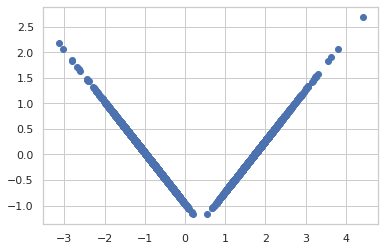

In [85]:
plt.scatter(x_PCA_out1[:,0],x_PCA_out1[:,1])

PCA analysis usually transforms a set of correlated variables to a set of uncorrelated variables. This type of analysis is used to examine the interrelations among a set of variables.

This plot shows that the two variables that were analysed are different. If the plot had been mixed, then it would suggest that the variables are similar. the plot also suggests that there are times that the variables become very similar and times when they become very different. This makes sense considering that values close to zero for both variables indicate samples that had no change in methylation.

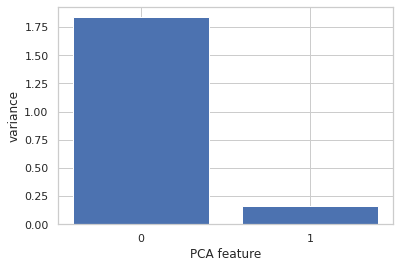

In [86]:
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(PCA_methy_demethy_df_transposed)

# Plot the explained variances
features = range(pca.n_components_) #use the pca components as a range for the bar plot of variances
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Most of the variance of the data is explained in PCA 0. PCA 1 shows very little variability, indicating that this data probably only has an intrinsic dimension of 1.

For more information on PCAs, check: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### Can we do unsupervised clustering with PCA differently?

In [87]:
PCA_data = lozoya_data.loc[:,'Δ%mCG']
PCA_data.head()

0    29.19
1    19.10
2   -27.08
3   -26.59
4    38.57
Name: Δ%mCG, dtype: float64

In [88]:
PCA_data_transposed=PCA_data.T
PCA_data_transposed.head()

0    29.19
1    19.10
2   -27.08
3   -26.59
4    38.57
Name: Δ%mCG, dtype: float64

In [89]:
#cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
#    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
#    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

## Gene Ontology Analysis

I had to use a couple of websites for this. I have been told by bioinformaticians before that it is easier to use the websites than to do this manually in R or python. Websites for GO used:
- http://pantherdb.org/chart/pantherChart
- http://cbl-gorilla.cs.technion.ac.il/
- http://revigo.irb.hr/  (can access revigo via gorilla)


### Molecular Functions

In [90]:
from google.colab import files
uploaded = files.upload()

Saving GOMolecularFunction_modified.csv to GOMolecularFunction_modified.csv


In [91]:
import io
GO_MolecularFunc=pd.read_csv(io.BytesIO(uploaded['GOMolecularFunction_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

In [92]:
GO_MolecularFunc.head()

,Unnamed: 0,Molecular Function,Numb,PercGeneTot,PercFuncTot,PercGeneTot*100,PercFuncTot*100
0,1,transcription regulator activity (GO:0140110),28,0.061,0.104,6.1,10.4
1,2,molecular transducer activity (GO:0060089),23,0.050,0.085,5.0,8.5
2,3,binding (GO:0005488),108,0.235,0.400,23.5,40.0
3,4,structural molecule activity (GO:0005198),5,0.011,0.019,1.1,1.9
4,5,molecular function regulator (GO:0098772),14,0.030,0.052,3.0,5.2


([<matplotlib.patches.Wedge at 0x7fbfca79de80>,
 [Text(1.0418987901044807, 0.35277033772529637, 'transcription regulator activity (GO:0140110)'),
  Text(0.665933989584454, 0.8755180874865651, 'molecular transducer activity (GO:0060089)'),
  Text(-0.8443284499021425, 0.7050599043243385, 'binding (GO:0005488)'),
  Text(-0.8947380682220099, -0.6398779487326831, 'structural molecule activity (GO:0005198)'),
  Text(-0.7339995369274304, -0.8192952335942875, 'molecular function regulator (GO:0098772)'),
  Text(0.27663717359758505, -1.064646361090827, 'catalytic activity (GO:0003824)'),
  Text(1.0668329930626392, -0.26808089248025657, 'transporter activity (GO:0005215)')])

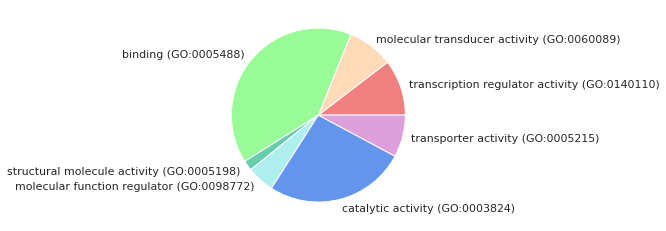

In [93]:
colours=['lightcoral','peachpuff','palegreen','mediumaquamarine','paleturquoise','cornflowerblue','plum']
plt.pie(x=GO_MolecularFunc['PercGeneTot*100'], labels=GO_MolecularFunc['Molecular Function'],colors=colours)

### Biological Process


In [94]:
from google.colab import files
uploaded = files.upload()

Saving GOBiologicalProcess_modified.csv to GOBiologicalProcess_modified.csv


In [95]:
import io
GO_BiologicalProc=pd.read_csv(io.BytesIO(uploaded['GOBiologicalProcess_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

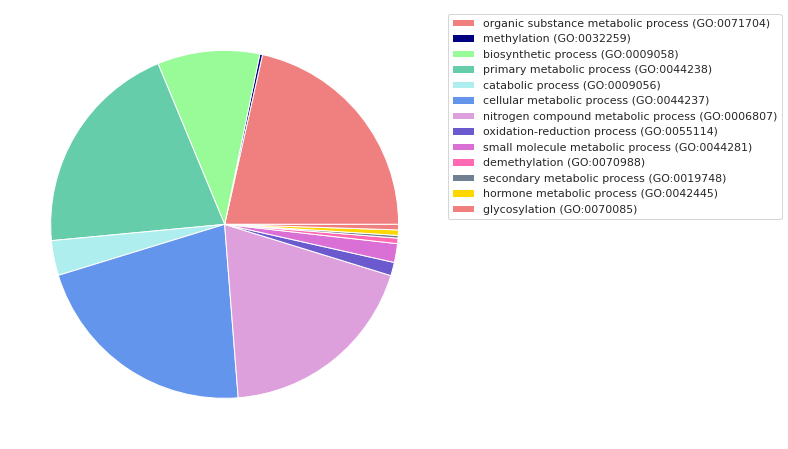

In [96]:
plt.figure(figsize=(20,8))
colours=['lightcoral','navy','palegreen','mediumaquamarine','paleturquoise','cornflowerblue','plum','slateblue','orchid','hotpink','slategray','gold']
#explosion=(0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(x=GO_BiologicalProc['PercGeneTot*100'], colors=colours)
plt.legend(GO_BiologicalProc['Biological Process'],loc=3,bbox_to_anchor=(1, 0.5))



In [97]:
GO_BiologicalProc.head()

,Unnamed: 0,Biological Process,Numb,PercGeneTot,PercFuncTot,PercGeneTot*100,PercFuncTot*100
0,1,organic substance metabolic process (GO:0071704),86,0.935,0.215,93.5,21.5
1,2,methylation (GO:0032259),1,0.011,0.003,1.1,0.3
2,3,biosynthetic process (GO:0009058),38,0.413,0.095,41.3,9.5
3,4,primary metabolic process (GO:0044238),81,0.880,0.203,88.0,20.3
4,5,catabolic process (GO:0009056),13,0.141,0.033,14.1,3.3


In [98]:
GO_BiologicalProc.shape

(13, 7)

As for now, I have not managed to move away the legend box.

### Cellular Component

In [99]:
from google.colab import files
uploaded = files.upload()

Saving GOCellularComponent_modified.csv to GOCellularComponent_modified.csv


In [100]:
import io
GO_CellularComp=pd.read_csv(io.BytesIO(uploaded['GOCellularComponent_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

In [101]:
GO_CellularComp.head()

,Unnamed: 0,Cellular Component,Numb,PercGeneTot,PercFuncTot,PercGeneTot*100,PercFuncTot*100
0,1,synapse part (GO:0044456),9,0.020,0.011,2.0,1.1
1,2,membrane part (GO:0044425),55,0.120,0.067,12.0,6.7
2,3,membrane (GO:0016020),95,0.207,0.116,20.7,11.6
3,4,synapse (GO:0045202),9,0.020,0.011,2.0,1.1
4,5,organelle part (GO:0044422),46,0.100,0.056,10.0,5.6


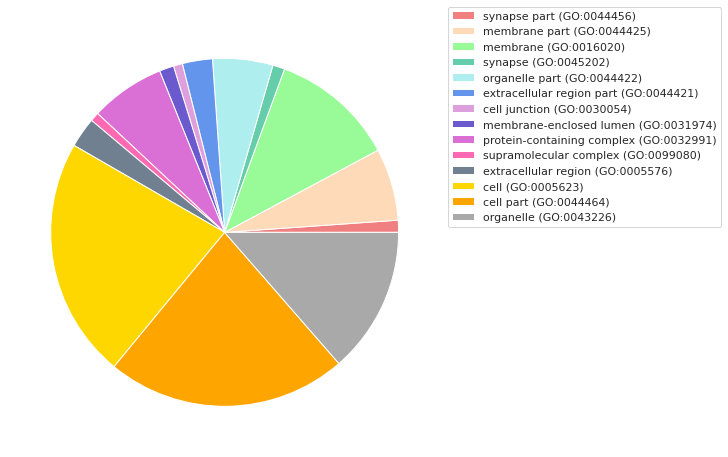

In [102]:
plt.figure(figsize=(20,8))
colours=['lightcoral','peachpuff','palegreen','mediumaquamarine','paleturquoise','cornflowerblue','plum','slateblue','orchid','hotpink','slategray','gold','orange','darkgrey']
#explosion=(0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(x=GO_CellularComp['PercGeneTot*100'], colors=colours)
plt.legend(GO_CellularComp['Cellular Component'],loc=3,bbox_to_anchor=(1, 0.5))
#plt.legend(GO_BiologicalProc['Biological Process'],loc=3,bbox_to_anchor=(1, 0.5))

### Pathways

In [103]:
from google.colab import files
uploaded = files.upload()

Saving GOPathways_modified.csv to GOPathways_modified.csv


In [104]:
import io
GO_Pathways=pd.read_csv(io.BytesIO(uploaded['GOPathways_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

In [105]:
GO_Pathways.head()

,Unnamed: 0,Pathways,Numb,PercGeneTot,PercFuncTot,PercGeneTot*100,PercFuncTot*100
0,14,Wnt signaling pathway (P00057),14,0.030,0.058,3.0,5.8
1,5,Gonadotropin-releasing hormone receptor pathwa...,13,0.028,0.054,2.8,5.4
2,8,Alzheimer disease-presenilin pathway (P00004),9,0.020,0.038,2.0,3.8
3,39,Integrin signalling pathway (P00034),9,0.020,0.038,2.0,3.8
4,6,Angiogenesis (P00005),8,0.017,0.033,1.7,3.3


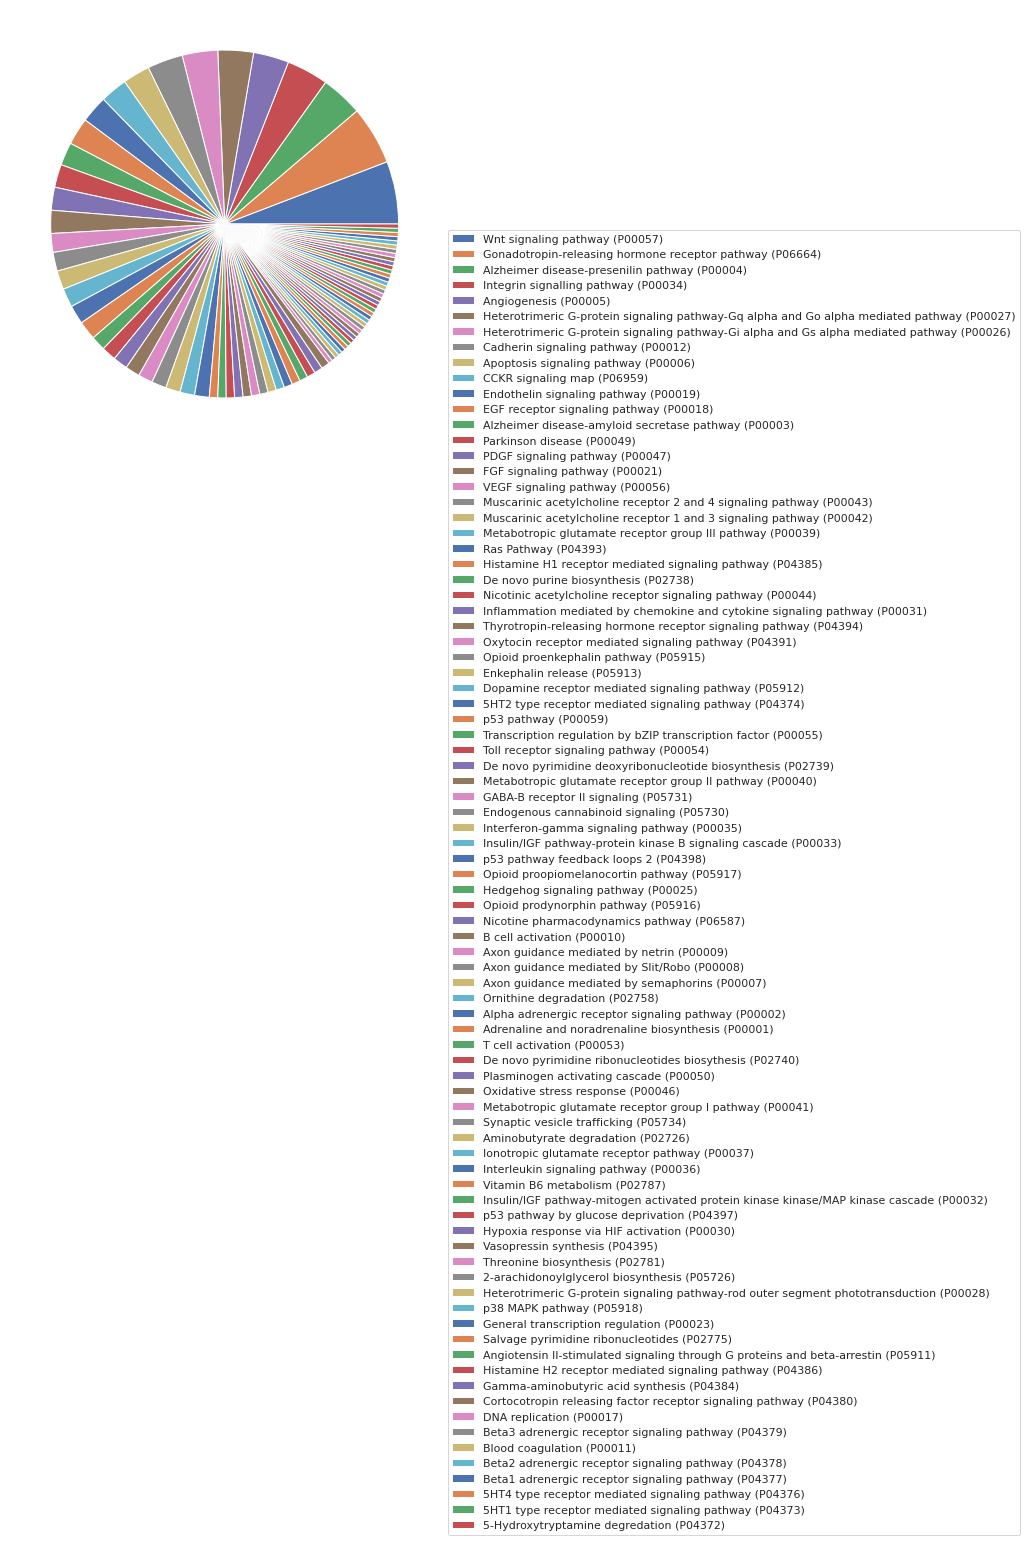

In [106]:
plt.figure(figsize=(20,8))
plt.pie(x=GO_Pathways['PercGeneTot*100'])
plt.legend(GO_Pathways['Pathways'],loc=2,bbox_to_anchor=(1, 0.5))


### Protein Class

In [107]:
from google.colab import files
uploaded = files.upload()

Saving GOProteinClass_modified.csv to GOProteinClass_modified.csv


In [108]:
import io
GO_ProteinCl=pd.read_csv(io.BytesIO(uploaded['GOProteinClass_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

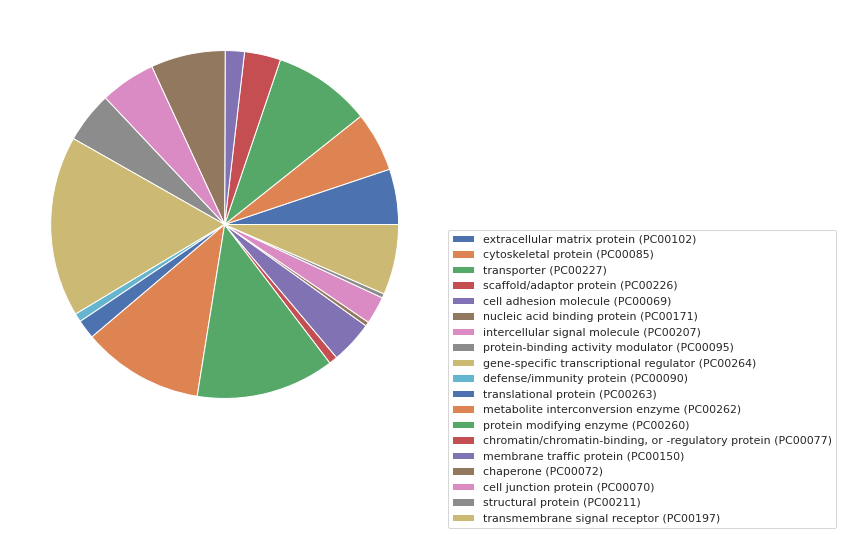

In [109]:
plt.figure(figsize=(20,8))
plt.pie(x=GO_ProteinCl['PercGeneTot*100'])
plt.legend(GO_ProteinCl['Protein Class'],loc=2,bbox_to_anchor=(1, 0.5))

### Combining all Gene Ontology information

I used Panther to download all the information, in a big table, that it computed based on the ~500 genes that were most significant from the dataset. Now, I want to see if I can extract different information from that big table.

In [110]:
from google.colab import files
uploaded = files.upload()

Saving pantherGeneList_Complete_modified.csv to pantherGeneList_Complete_modified.csv


In [111]:
import io
GO_panther=pd.read_csv(io.BytesIO(uploaded['pantherGeneList_Complete_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

In [112]:
GO_panther.head()

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
0,HUMAN|HGNC=11499|UniProtKB=O43760,SYNGR2,Synaptogyrin-2;SYNGR2;ortholog,SYNAPTOGYRIN-2 (PTHR10838:SF30),membrane trafficking regulatory protein(PC00151),Homo sapiens,NaN,NaN,neuromuscular junction(GO:0031594);synaptic ve...,78168602.0,78173527.0,17.0,NaN,protein binding(GO:0005515),viral process(GO:0016032);regulated exocytosis...,lipid droplet(GO:0005811);integral component o...,NaN
1,HUMAN|HGNC=29581|UniProtKB=Q8WW18,C17orf50,Uncharacterized protein C17orf50;C17orf50;orth...,HYPOTHETICAL PROTEIN LOC689039 (PTHR37878:SF1),NaN,Homo sapiens,NaN,NaN,NaN,35760910.0,35764597.0,17.0,NaN,NaN,NaN,NaN,NaN
2,HUMAN|HGNC=18333|UniProtKB=Q4W5G0,TIGD2,Tigger transposable element-derived protein 2;...,TIGGER TRANSPOSABLE ELEMENT-DERIVED PROTEIN 2 ...,NaN,Homo sapiens,NaN,NaN,NaN,89112817.0,89114899.0,4.0,NaN,DNA binding(GO:0003677),NaN,nucleus(GO:0005634),NaN
3,HUMAN|HGNC=13019|UniProtKB=Q9NYT6,ZNF226,Zinc finger protein 226;ZNF226;ortholog,ZINC FINGER PROTEIN 226 (PTHR24376:SF118),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,44165101.0,44177687.0,19.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...


In [113]:
GO_panther.shape

(460, 17)

In [114]:
GO_panther.dtypes

Gene_ID                                object
Mapped_IDs                             object
Gene_Name;Symbol;Ortholog              object
Panther_Family/Subfamily               object
Panther_Protein_Class                  object
Species                                object
Panther_GO-Slim_Molecular_Function     object
Panther_GO-Slim_Biological Process     object
Panther_GO-Slim_Cellular Component     object
Public_Start_Pos                      float64
Public_End_Pos                        float64
Public_Location_chromosome            float64
Pathway                                object
GO_database_MF_Complete                object
GO_database_BP_Complete                object
GO_database_CC_Complete                object
Reactome_Pathway                       object
dtype: object

In [115]:
GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('binding',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
5,HUMAN|HGNC=17619|UniProtKB=Q9NXR1,NDE1,Nuclear distribution protein nudE homolog 1;ND...,NUCLEAR DISTRIBUTION PROTEIN NUDE HOMOLOG 1 (P...,NaN,Homo sapiens,microtubule binding(GO:0008017),centrosome localization(GO:0051642);establishm...,centrosome(GO:0005813);centriole(GO:0005814);k...,15650257.0,15700491.0,16.0,NaN,protein binding(GO:0005515);microtubule bindin...,G2/M transition of mitotic cell cycle(GO:00000...,kinetochore(GO:0000776);condensed chromosome k...,"Cell Cycle, Mitotic;Cilium Assembly;Loss of Nl..."
10,HUMAN|HGNC=26226|UniProtKB=Q5TGS1,HES3,Transcription factor HES-3;HES3;ortholog,TRANSCRIPTION FACTOR HES-3 (PTHR10985:SF5),basic helix-loop-helix transcription factor(PC...,Homo sapiens,RNA polymerase II proximal promoter sequence-s...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),6244192.0,6245578.0,1.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:0005634),NaN
22,HUMAN|HGNC=1121|UniProtKB=P35070,BTC,Probetacellulin;BTC;ortholog,PROBETACELLULIN (PTHR10740:SF3),growth factor(PC00112),Homo sapiens,growth factor activity(GO:0008083);growth fact...,cell population proliferation(GO:0008283);epid...,extracellular space(GO:0005615),74746379.0,74794686.0,4.0,EGF receptor signaling pathway->Epidermal grow...,epidermal growth factor receptor binding(GO:00...,MAPK cascade(GO:0000165);signal transduction(G...,extracellular region(GO:0005576);extracellular...,Signaling by PTK6;Signaling by Non-Receptor Ty...
25,HUMAN|HGNC=28356|UniProtKB=Q8TBP0,TBC1D16,TBC1 domain family member 16;TBC1D16;ortholog,TBC1 DOMAIN FAMILY MEMBER 16 (PTHR22957:SF547),GTPase-activating protein(PC00257),Homo sapiens,GTPase activity(GO:0003924);GTPase activator a...,intracellular protein transport(GO:0006886);po...,early endosome(GO:0005769);vacuole(GO:0005773)...,79950571.0,79950828.0,17.0,NaN,GTPase activator activity(GO:0005096);protein ...,regulation of receptor recycling(GO:0001919);i...,early endosome(GO:0005769);cytosol(GO:0005829),Membrane Trafficking;Rab regulation of traffic...
28,HUMAN|HGNC=17210|UniProtKB=Q8IY37,DHX37,Probable ATP-dependent RNA helicase DHX37;DHX3...,ATP-DEPENDENT RNA HELICASE DHX37-RELATED (PTHR...,RNA helicase(PC00032),Homo sapiens,RNA binding(GO:0003723),maturation of SSU-rRNA from tricistronic rRNA ...,nucleolus(GO:0005730),124964393.0,124980698.0,12.0,NaN,nucleic acid binding(GO:0003676);RNA binding(G...,maturation of SSU-rRNA from tricistronic rRNA ...,intracellular(GO:0005622);nucleus(GO:0005634);...,Metabolism of RNA;rRNA processing in the nucle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,HUMAN|HGNC=14434|UniProtKB=Q96Q40,CDK15,Cyclin-dependent kinase 15;CDK15;ortholog,CYCLIN-DEPENDENT KINASE 15 (PTHR24056:SF159),non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein binding(GO:0005515);cyclin-dependent p...,protein phosphorylation(GO:0006468),nucleus(GO:0005634);cytosol(GO:0005829),201806621.0,201893543.0,2.0,NaN,protein serine/threonine kinase activity(GO:00...,protein phosphorylation(GO:0006468);regulation...,nucleus(GO:0005634);cytoplasm(GO:0005737);cyto...,NaN
445,HUMAN|HGNC=3023|UniProtKB=P14416,DRD2,D(2) dopamine receptor;DRD2;ortholog,D(2) DOPAMINE RECEPTOR (PTHR24248:SF87),G-protein coupled receptor(PC00021),Homo sapiens,postsynaptic neurotransmitter receptor activit...,adenylate cyclase-inhibiting G protein-coupled...,synaptic vesicle membrane(GO:0030672);vacuole(...,113409616.0,113475279.0,11.0,Heterotrimeric G-protein signaling pathway-Gi ...,"dopamine neurotransmitter recept

In [116]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('binding',na=False)])

113

In [117]:
len(GO_panther['Panther_GO-Slim_Molecular_Function'].unique())

142

In [118]:
len(GO_panther['GO_database_MF_Complete'].unique())

360

This list seems to have two columns for similar types of data, so called 'Panther_GO-Slim_Molecular_Function' and the 'GO_database_MF_Complete', with the former showing 142 different unique terms, and the second showing 360 unique terms. Indeed, it seems like the second list has more detailed information. As I ran in the previous line of code, a search for 'transcription factor binding' in the first list, the second list instead showed around 5 different classifications.

In [119]:
GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('transcription factor binding',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
35,HUMAN|HGNC=11597|UniProtKB=Q13207,TBX2,T-box transcription factor TBX2;TBX2;ortholog,T-BOX TRANSCRIPTION FACTOR TBX2 (PTHR11267:SF82),Rel homology transcription factor(PC00252),Homo sapiens,RNA polymerase II-specific DNA-binding transcr...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),61399896.0,61409466.0,17.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,NaN
155,HUMAN|HGNC=4651|UniProtKB=P29084,GTF2E2,Transcription initiation factor IIE subunit be...,TRANSCRIPTION INITIATION FACTOR IIE SUBUNIT BE...,general transcription factor(PC00259),Homo sapiens,basal RNA polymerase II transcription machiner...,transcription initiation from RNA polymerase I...,RNA polymerase II transcription factor complex...,30612470.0,30658032.0,8.0,Transcription regulation by bZIP transcription...,DNA binding(GO:0003677);RNA binding(GO:0003723...,transcription by RNA polymerase II(GO:0006366)...,nucleoplasm(GO:0005654);transcription factor T...,Transcription of the HIV genome;RNA Polymerase...
159,HUMAN|HGNC=26148|UniProtKB=Q6UUV7,CRTC3,CREB-regulated transcription coactivator 3;CRT...,CREB-REGULATED TRANSCRIPTION COACTIVATOR 3 (PT...,transcription cofactor(PC00217),Homo sapiens,DNA-binding transcription factor binding(GO:01...,transcription by RNA polymerase II(GO:0006366)...,nucleus(GO:0005634);cytoplasm(GO:0005737),90529968.0,90642813.0,15.0,NaN,protein binding(GO:0005515);cAMP response elem...,viral process(GO:0016032);positive regulation ...,nucleus(GO:0005634);nucleoplasm(GO:0005654);cy...,Transcriptional activation of mitochondrial bi...
173,HUMAN|HGNC=11717|UniProtKB=Q15561,TEAD4,Transcriptional enhancer factor TEF-3;TEAD4;or...,TRANSCRIPTIONAL ENHANCER FACTOR TEF-3 (PTHR118...,DNA-binding transcription factor(PC00218),Homo sapiens,DNA-binding transcription factor activity(GO:0...,transcription by RNA polymerase II(GO:0006366)...,nucleus(GO:0005634);transcription factor compl...,2959944.0,3021920.0,12.0,NaN,"DNA-binding transcription factor activity, RNA...",skeletal system development(GO:0001501);transc...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,RUNX3 regulates YAP1-mediated transcription;Tr...
250,HUMAN|HGNC=9005|UniProtKB=Q99697,PITX2,Pituitary homeobox 2;PITX2;ortholog,PITUITARY HOMEOBOX 2 (PTHR45882:SF4),NaN,Homo sapiens,RNA polymerase II transcription factor binding...,anatomical structure morphogenesis(GO:0009653),nucleus(GO:0005634),110618586.0,110637026.0,4.0,Gonadotropin-releasing hormone receptor pathwa...,transcription regulatory region sequence-speci...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,Transcriptional regulation by the AP-2 (TFAP2)...
322,HUMAN|HGNC=5115|UniProtKB=P17483,HOXB4,Homeobox protein Hox-B4;HOXB4;ortholog,HOMEOBOX PROTEIN HOX-B4 (PTHR45771:SF3),NaN,Homo sapiens,RNA polymerase II regulatory region sequence-s...,chordate embryonic development(GO:0043009);ske...,nucleus(GO:0005634),48575513.0,48580111.0,17.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,Developmental Biology;Activation of anterior H...
330,HUMAN|HGNC=5105|UniProtKB=Q00056,HOXA4,Homeobox protein Hox-A4;HOXA4;ortholog,HOMEOBOX PROTEIN HOX-A4 (PTHR45771:SF2),NaN,Homo sapiens,RNA polymerase II regulatory region sequence-s...,chordate embryonic development(GO:0043009);ske...,nucleus(GO:0005634),27128507.0,27130191.0,7.0,NaN,RNA polymerase II regulatory region sequence-s...,skeletal system deve

In [120]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('transcription factor binding',na=False)])

8

In [121]:
len(GO_panther[GO_panther['GO_database_MF_Complete'].str.contains('transcription factor binding',na=False)])

14

In [122]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('RNA polymerase II',na=False)])

22

In [123]:
len(GO_panther[GO_panther['GO_database_MF_Complete'].str.contains('RNA polymerase II',na=False)])

41

In [124]:
#percentage of 'RNA polymerase II' from the total of GO terms investigated.
print((22/460)*100)
print((41/460)*100)

4.782608695652174
8.91304347826087


In [125]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('DNA binding|RNA binding',na=False)])

34

In [126]:
len(GO_panther[GO_panther['GO_database_MF_Complete'].str.contains('DNA binding|RNA binding',na=False)])

92

In [127]:
#percentage of 'DNA binding' OR 'RNA binding' from the total of GO terms investigated
print((34/460)*100)
print((92/460)*100)

7.391304347826087
20.0


In [128]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('DNA binding|RNA binding|RNA polymerase II',na=False)])

41

In [129]:
len(GO_panther[GO_panther['GO_database_MF_Complete'].str.contains('DNA binding|RNA binding|RNA polymerase II',na=False)])

93

In [130]:
#percentage of 'DNA binding' OR 'RNA binding' OR 'RNA polymerase II' from the total of GO terms investigated
print((41/460)*100)
print((93/460)*100)

8.91304347826087
20.217391304347824


In [131]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('transcription',na=False)])

32

In [132]:
len(GO_panther[GO_panther['GO_database_MF_Complete'].str.contains('transcription',na=False)])

58

In [133]:
#percentage of 'transcription' from the total of GO terms investigated
print((32/460)*100)
print((58/460)*100)

6.956521739130435
12.608695652173912


In [134]:
len(GO_panther[GO_panther['Panther_GO-Slim_Molecular_Function'].str.contains('DNA binding|RNA binding|RNA polymerase II|transcription',na=False)])

45

In [135]:
len(GO_panther[GO_panther['GO_database_MF_Complete'].str.contains('DNA binding|RNA binding|RNA polymerase II|transcription',na=False)])

104

#### 20% of genes involved in DNA, RNA and transcription

In [136]:
#percentage of 'DNA binding' OR 'RNA binding' OR 'RNA polymerase II' OR 'transcription' from the total of GO terms investigated
print((45/460)*100)
print((104/460)*100)

9.782608695652174
22.608695652173914


In [137]:
GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('negative regulation',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...
10,HUMAN|HGNC=26226|UniProtKB=Q5TGS1,HES3,Transcription factor HES-3;HES3;ortholog,TRANSCRIPTION FACTOR HES-3 (PTHR10985:SF5),basic helix-loop-helix transcription factor(PC...,Homo sapiens,RNA polymerase II proximal promoter sequence-s...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),6244192.0,6245578.0,1.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:0005634),NaN
14,HUMAN|HGNC=28850|UniProtKB=Q8WUA8,TSKU,Tsukushin;TSKU;ortholog,TSUKUSHIN (PTHR45617:SF14),NaN,Homo sapiens,NaN,NaN,NaN,76784148.0,76796068.0,11.0,NaN,NaN,regulation of gene expression(GO:0010468);corp...,extracellular space(GO:0005615),NaN
19,HUMAN|HGNC=8812|UniProtKB=Q16654,PDK4,[Pyruvate dehydrogenase (acetyl-transferring)]...,[PYRUVATE DEHYDROGENASE (ACETYL-TRANSFERRING)]...,non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein serine/threonine kinase activity(GO:00...,negative regulation of catalytic activity(GO:0...,mitochondrion(GO:0005739),95583499.0,95596491.0,7.0,NaN,protein kinase activity(GO:0004672);protein se...,glucose metabolic process(GO:0006006);protein ...,mitochondrion(GO:0005739);mitochondrial matrix...,Signaling by Nuclear Receptors;Signal Transduc...
22,HUMAN|HGNC=1121|UniProtKB=P35070,BTC,Probetacellulin;BTC;ortholog,PROBETACELLULIN (PTHR10740:SF3),growth factor(PC00112),Homo sapiens,growth factor activity(GO:0008083);growth fact...,cell population proliferation(GO:0008283);epid...,extracellular space(GO:0005615),74746379.0,74794686.0,4.0,EGF receptor signaling pathway->Epidermal grow...,epidermal growth factor receptor binding(GO:00...,MAPK cascade(GO:0000165);signal transduction(G...,extracellular region(GO:0005576);extracellular...,Signaling by PTK6;Signaling by Non-Receptor Ty...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,HUMAN|HGNC=6716|UniProtKB=Q9NS15,LTBP3,Latent-transforming growth factor beta-binding...,LATENT-TRANSFORMING GROWTH FACTOR BETA-BINDING...,extracellular matrix structural protein(PC00103),Homo sapiens,NaN,cellular component assembly(GO:0022607);supram...,NaN,65538560.0,65553727.0,11.0,NaN,calcium ion binding(GO:0005509);transforming g...,transforming growth factor beta receptor signa...,extracellular region(GO:0005576);collagen-cont...,Elastic fibre formation;Extracellular matrix o...
444,HUMAN|HGNC=25331|UniProtKB=Q8NDQ6,ZNF540,Zinc finger protein 540;ZNF540;ortholog,ZINC FINGER PROTEIN 540 (PTHR24377:SF138),NaN,Homo sapiens,NaN,NaN,NaN,37594909.0,37614095.0,19.0,NaN,"translation repressor activity, mRNA regulator...","regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634);nucleoplasm(GO:0005654);cy...,RNA Polymerase II Transcription;Generic Transc...
445,HUMAN|HGNC=3023|UniProtKB=P14416,DRD2,D(2) dopamine receptor;DRD2;ortholog,D(2) DOPAMINE RECEPTOR (PTHR24248:SF87),G-protein coupled receptor(PC00021),Homo sapiens,postsynaptic neurotransmitter receptor activit...,adenylate cyclase-inhibiting G protein-coupled...,synaptic vesicle membrane(GO:0030672);vacuole(...,113409616.0,113475279.0,11.0,Heterotrimeric G-protein sig

#### 30% of genes involved in negative regulation

In [138]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('negative regulation',na=False)])

141

In [139]:
#percentage of 'negative regulation' from the total of GO terms investigated
(141/460)*100

30.65217391304348

In [140]:
#all of the 'negative regulation' terms are unique!
negative_reg=GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('negative regulation',na=False)]
len(negative_reg['GO_database_BP_Complete'].unique())

141

In [141]:
len(GO_panther[GO_panther['Panther_GO-Slim_Biological Process'].str.contains('negative regulation',na=False)])

20

Again seems like the 'Slim' column has less terms than the other column for Biological processes. Which makes sense: turns out that on the Panther website it states "PANTHER uses only a subset of GO terms (“GO slim”) to facilitate browsing".

#### How many genes differentially methylated are targeted to the mitochondria?

In [142]:
GO_panther[GO_panther['GO_database_CC_Complete'].str.contains('mitochondrion',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...
19,HUMAN|HGNC=8812|UniProtKB=Q16654,PDK4,[Pyruvate dehydrogenase (acetyl-transferring)]...,[PYRUVATE DEHYDROGENASE (ACETYL-TRANSFERRING)]...,non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein serine/threonine kinase activity(GO:00...,negative regulation of catalytic activity(GO:0...,mitochondrion(GO:0005739),95583499.0,95596491.0,7.0,NaN,protein kinase activity(GO:0004672);protein se...,glucose metabolic process(GO:0006006);protein ...,mitochondrion(GO:0005739);mitochondrial matrix...,Signaling by Nuclear Receptors;Signal Transduc...
26,HUMAN|HGNC=408|UniProtKB=P51649,ALDH5A1,"Succinate-semialdehyde dehydrogenase, mitochon...","SUCCINATE-SEMIALDEHYDE DEHYDROGENASE, MITOCHON...",dehydrogenase(PC00092),Homo sapiens,oxidoreductase activity(GO:0016491),NaN,NaN,24494852.0,24533757.0,6.0,5-Hydroxytryptamine degredation->Aldehyde Dehy...,succinate-semialdehyde dehydrogenase (NAD+) ac...,succinate metabolic process(GO:0006105);glutam...,mitochondrion(GO:0005739);mitochondrial matrix...,Degradation of GABA;Neurotransmitter release c...
42,HUMAN|HGNC=29579|UniProtKB=Q8TC71,SPATA18,Mitochondria-eating protein;SPATA18;ortholog,MITOCHONDRIA-EATING PROTEIN (PTHR21771:SF0),NaN,Homo sapiens,NaN,cellular protein catabolic process(GO:0044257)...,mitochondrial outer membrane(GO:0005741),52051542.0,52062324.0,4.0,NaN,protein binding(GO:0005515),cellular response to DNA damage stimulus(GO:00...,cytoplasm(GO:0005737);mitochondrion(GO:0005739...,NaN
52,HUMAN|HGNC=5233|UniProtKB=P0DMV9,HSPA1B,Heat shock 70 kDa protein 1B;HSPA1B;ortholog,HEAT SHOCK 70 KDA PROTEIN 1A-RELATED (PTHR1937...,NaN,Homo sapiens,ATP binding(GO:0005524);heat shock protein bin...,proteasome-mediated ubiquitin-dependent protei...,extracellular space(GO:0005615);cytosol(GO:000...,31827735.0,31830255.0,6.0,Gonadotropin-releasing hormone receptor pathwa...,virus receptor activity(GO:0001618);G protein-...,mRNA catabolic process(GO:0006402);response to...,extracellular region(GO:0005576);nucleus(GO:00...,HSP90 chaperone cycle for steroid hormone rece...
88,HUMAN|HGNC=16354|UniProtKB=Q8IWW8,ADHFE1,"Hydroxyacid-oxoacid transhydrogenase, mitochon...","HYDROXYACID-OXOACID TRANSHYDROGENASE, MITOCHON...",NaN,Homo sapiens,"oxidoreductase activity, acting on the CH-OH g...",NaN,NaN,66432498.0,66445324.0,8.0,NaN,alcohol dehydrogenase (NAD+) activity(GO:00040...,2-oxoglutarate metabolic process(GO:0006103);g...,mitochondrion(GO:0005739);mitochondrial matrix...,Interconversion of 2-oxoglutarate and 2-hydrox...
209,HUMAN|HGNC=23846|UniProtKB=Q96BF6,NACC2,Nucleus accumbens-associated protein 2;NACC2;o...,NUCLEUS ACCUMBENS-ASSOCIATED PROTEIN 2 (PTHR46...,NaN,Homo sapiens,NaN,NaN,NaN,136006537.0,136095285.0,9.0,NaN,RNA polymerase II cis-regulatory region sequen...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,NaN
244,HUMAN|HGNC=25550|UniProtKB=Q96TC7,FAM82A2,Regulator of microtubule dynamics protein 3;RM...,REGULATOR OF MICROTUBULE DYNAMICS PROTEIN 3 (P...,NaN,Homo sapiens,NaN,NaN,NaN,40738510.0,40755336.0,15.0,NaN,protein binding(GO:0005515),cellular calcium ion homeostasis(GO:0006874);a...,spindle pole(GO:00009

In [143]:
len(GO_panther[GO_panther['GO_database_CC_Complete'].str.contains('mitochondrion|mitochondrial|mitochondria',na=False)])

30

In [144]:
len(GO_panther[GO_panther['Panther_GO-Slim_Cellular Component'].str.contains('mitochondrion|mitochondrial|mitochondria',na=False)])

9

In [145]:
#percentage of genes targeted to 'mitochondria' from the total of GO terms investigated
(30/460)*100

6.521739130434782

In [146]:
GO_panther[GO_panther['GO_database_CC_Complete'].str.contains('mitochondrion|mitochondrial|mitochondria',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...
19,HUMAN|HGNC=8812|UniProtKB=Q16654,PDK4,[Pyruvate dehydrogenase (acetyl-transferring)]...,[PYRUVATE DEHYDROGENASE (ACETYL-TRANSFERRING)]...,non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein serine/threonine kinase activity(GO:00...,negative regulation of catalytic activity(GO:0...,mitochondrion(GO:0005739),95583499.0,95596491.0,7.0,NaN,protein kinase activity(GO:0004672);protein se...,glucose metabolic process(GO:0006006);protein ...,mitochondrion(GO:0005739);mitochondrial matrix...,Signaling by Nuclear Receptors;Signal Transduc...
26,HUMAN|HGNC=408|UniProtKB=P51649,ALDH5A1,"Succinate-semialdehyde dehydrogenase, mitochon...","SUCCINATE-SEMIALDEHYDE DEHYDROGENASE, MITOCHON...",dehydrogenase(PC00092),Homo sapiens,oxidoreductase activity(GO:0016491),NaN,NaN,24494852.0,24533757.0,6.0,5-Hydroxytryptamine degredation->Aldehyde Dehy...,succinate-semialdehyde dehydrogenase (NAD+) ac...,succinate metabolic process(GO:0006105);glutam...,mitochondrion(GO:0005739);mitochondrial matrix...,Degradation of GABA;Neurotransmitter release c...
36,HUMAN|HGNC=26801|UniProtKB=Q8N8Q8,COX18,"Cytochrome c oxidase assembly protein COX18, m...","CYTOCHROME C OXIDASE ASSEMBLY PROTEIN COX18, M...",transporter(PC00227),Homo sapiens,cofactor binding(GO:0048037),mitochondrial respiratory chain complex IV ass...,integral component of mitochondrial inner memb...,73058076.0,73069741.0,4.0,NaN,protein binding(GO:0005515);membrane insertase...,respiratory chain complex IV assembly(GO:00085...,integral component of membrane(GO:0016021);int...,The citric acid (TCA) cycle and respiratory el...
42,HUMAN|HGNC=29579|UniProtKB=Q8TC71,SPATA18,Mitochondria-eating protein;SPATA18;ortholog,MITOCHONDRIA-EATING PROTEIN (PTHR21771:SF0),NaN,Homo sapiens,NaN,cellular protein catabolic process(GO:0044257)...,mitochondrial outer membrane(GO:0005741),52051542.0,52062324.0,4.0,NaN,protein binding(GO:0005515),cellular response to DNA damage stimulus(GO:00...,cytoplasm(GO:0005737);mitochondrion(GO:0005739...,NaN
52,HUMAN|HGNC=5233|UniProtKB=P0DMV9,HSPA1B,Heat shock 70 kDa protein 1B;HSPA1B;ortholog,HEAT SHOCK 70 KDA PROTEIN 1A-RELATED (PTHR1937...,NaN,Homo sapiens,ATP binding(GO:0005524);heat shock protein bin...,proteasome-mediated ubiquitin-dependent protei...,extracellular space(GO:0005615);cytosol(GO:000...,31827735.0,31830255.0,6.0,Gonadotropin-releasing hormone receptor pathwa...,virus receptor activity(GO:0001618);G protein-...,mRNA catabolic process(GO:0006402);response to...,extracellular region(GO:0005576);nucleus(GO:00...,HSP90 chaperone cycle for steroid hormone rece...
69,HUMAN|HGNC=23081|UniProtKB=Q8TEB9,RHBDD1,Rhomboid-related protein 4;RHBDD1;ortholog,RHOMBOID-RELATED PROTEIN 4 (PTHR43066:SF14),serine protease(PC00203),Homo sapiens,serine-type endopeptidase activity(GO:0004252),NaN,NaN,226836056.0,226867206.0,2.0,NaN,endopeptidase activity(GO:0004175);serine-type...,proteolysis(GO:0006508);apoptotic process(GO:0...,endoplasmic reticulum(GO:0005783);endoplasmic ...,NaN
88,HUMAN|HGNC=16354|UniProtKB=Q8IWW8,ADHFE1,"Hydroxyacid-oxoacid transhydrogenase, mitochon...","HYDROXYACID-OXOACID TRANSHYDROGENASE, MITOCHON...",NaN,Homo sapiens,"oxi

###Can we compute whether the probability of differentially methylated genes that localise to the mitochondria is random?

In [147]:
from google.colab import files
uploaded = files.upload()

Saving Total_pantherGeneList_modified.csv to Total_pantherGeneList_modified.csv


In [148]:
import io
GO_Total=pd.read_csv(io.BytesIO(uploaded['Total_pantherGeneList_modified.csv']))
# Dataset is now stored in a Pandas Dataframe

In [149]:
GO_Total.shape

(3668, 11)

In [150]:
len(GO_Total[GO_Total['GO_database_CC_Complete'].str.contains('mitochondrion|mitochondrial|mitochondria',na=False)])

270

In [151]:
from scipy.stats import hypergeom

In [152]:
#M=total differentially methylated genes=3668
#n=mitochondrially targetted genes from total differentially methylated genes=270
#N=statistically significant genes that were differentially methylated=460 
#k=statistically significant genes going to mitochondria from mitochondrially targetted genes from total differentially methylated genes=30

#hypergeom.cdf(k, M, n, N, size=10)
#cdf refers to cumulative, describes the sum of the probability mass up to some value.
hypergeom.cdf(30, 3668, 270, 460)

0.2645502616320353

In [153]:
#this is the same as using hypergeom.sf
1-hypergeom.cdf(30, 3668, 270, 460)

0.7354497383679647

Can I compute the expected value, so the expected number of mitochondrial targeted genes being significant if the probability would not be random?
https://systems.crump.ucla.edu/hypergeometric/index.php
This website helps make this calculate and states that for:
Parameters: 30, 460, 270, 3668

expected number of successes = 33.8604143947655

the results are enriched 1.13 fold compared to expectations

hypergeometric p-value = 0.264550261632077

So these results show that with these numbers it is expected that around 33 genes will be targeted to the mitochondria. Which means that genes that are targeted to the mitochondria are **not** enriched in significance compared to other genes. This "p-value" can be interpreted as bigger than 0.05 and hence we reject the hypothesis that there is a bias for mitochondrially targeted genes.

Another way of assessing this is with the hypergeom.pmf which looks at the probability of mass function, which in that one instance, 'k' many genes will be looked at and we will not be replacing them.

In [154]:
#M=total differentially methylated genes= 3668
#n=mitochondrially targetted genes from total differentially methylated genes=270
#N=statistically significant genes that were differentially methylated=460
#k-1=chances of k happening
#probability mass function
hypergeom.sf(30, 3668, 270, 460,loc=0)

0.7354497383675986

In [155]:
#M is total number of objects =3668
#n is total number of Type I objects = 270
#RV or k or x counts number of Type I objects in N drawn without replacement from population=30
#sf(x, M, n, N, loc=0)

hypergeom.sf(30-1,3668,270,460,loc=0)

0.7956927989021815

I have managed to reach a similar result by doing similar in R but the values inputed are not the same as you can do the comparison below. We see 'm' and 'k' from phyper swapped with 'n' and 'N' in hypergeom.sf.

Also in R, you seem to have to inform that a sample is taken without replacement, while in python you dont need to specify this.


```
# x=q, M=n+m, n=m, N=k.
#phyper(q, m, n, k, lower.tail = TRUE, log.p = FALSE)
> phyper(30-1,460,3668-460,270,lower.tail=FALSE)
[1] 0.7956928
```

In R you have to do '30-1' if you want to test if the probability of mitochondrial targeted genes becoming differentially methylated more often. In  this case the probability needs to be **bigger or equal** to the number of genes being tested.

The documentation for hypergeometric testing in python seems very limited. So I have decided to use the one for R.  https://seqqc.wordpress.com/2019/07/25/how-to-use-phyper-in-r/. 

(This link also suggests to use fisher.test. Next time it could be worth a try...)

Here it suggests: "When p-value <= 0.05, we can reject the null hypothesis (random number of mitochondriall targeted genes are differentially methylated) and assume a significant enrichment, that is, there is a small probablity of seing an equal or bigger overlap than x."

But our p-value is 0.79! which means that it is likely that these 30 genes were randomly selected from the entire genome.

### How many genes are involved in some type of metabolism?

In [156]:
GO_panther.head()

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
0,HUMAN|HGNC=11499|UniProtKB=O43760,SYNGR2,Synaptogyrin-2;SYNGR2;ortholog,SYNAPTOGYRIN-2 (PTHR10838:SF30),membrane trafficking regulatory protein(PC00151),Homo sapiens,NaN,NaN,neuromuscular junction(GO:0031594);synaptic ve...,78168602.0,78173527.0,17.0,NaN,protein binding(GO:0005515),viral process(GO:0016032);regulated exocytosis...,lipid droplet(GO:0005811);integral component o...,NaN
1,HUMAN|HGNC=29581|UniProtKB=Q8WW18,C17orf50,Uncharacterized protein C17orf50;C17orf50;orth...,HYPOTHETICAL PROTEIN LOC689039 (PTHR37878:SF1),NaN,Homo sapiens,NaN,NaN,NaN,35760910.0,35764597.0,17.0,NaN,NaN,NaN,NaN,NaN
2,HUMAN|HGNC=18333|UniProtKB=Q4W5G0,TIGD2,Tigger transposable element-derived protein 2;...,TIGGER TRANSPOSABLE ELEMENT-DERIVED PROTEIN 2 ...,NaN,Homo sapiens,NaN,NaN,NaN,89112817.0,89114899.0,4.0,NaN,DNA binding(GO:0003677),NaN,nucleus(GO:0005634),NaN
3,HUMAN|HGNC=13019|UniProtKB=Q9NYT6,ZNF226,Zinc finger protein 226;ZNF226;ortholog,ZINC FINGER PROTEIN 226 (PTHR24376:SF118),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,44165101.0,44177687.0,19.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...


In [157]:
GO_panther[GO_panther['Reactome_Pathway'].str.contains('metabolism',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...
7,HUMAN|HGNC=29213|UniProtKB=Q8WUJ3,KIAA1199,Cell migration-inducing and hyaluronan-binding...,CELL MIGRATION-INDUCING AND HYALURONAN-BINDING...,NaN,Homo sapiens,NaN,NaN,NaN,80936871.0,80951776.0,15.0,NaN,hyalurononglucosaminidase activity(GO:0004415)...,sensory perception of sound(GO:0007605);positi...,extracellular region(GO:0005576);cell(GO:00056...,Glycosaminoglycan metabolism;Hyaluronan biosyn...
12,HUMAN|HGNC=18718|UniProtKB=Q8WU67,ABHD3,Phospholipase ABHD3;ABHD3;ortholog,PHOSPHOLIPASE ABHD3 (PTHR10794:SF50),serine protease(PC00203),Homo sapiens,lipase activity(GO:0016298);carboxylic ester h...,cellular lipid metabolic process(GO:0044255),NaN,21682900.0,21704805.0,18.0,NaN,phospholipase A2 activity(GO:0004623);phosphol...,phosphatidylcholine biosynthetic process(GO:00...,cellular_component(GO:0005575);plasma membrane...,Phospholipid metabolism;Metabolism of lipids;G...
19,HUMAN|HGNC=8812|UniProtKB=Q16654,PDK4,[Pyruvate dehydrogenase (acetyl-transferring)]...,[PYRUVATE DEHYDROGENASE (ACETYL-TRANSFERRING)]...,non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein serine/threonine kinase activity(GO:00...,negative regulation of catalytic activity(GO:0...,mitochondrion(GO:0005739),95583499.0,95596491.0,7.0,NaN,protein kinase activity(GO:0004672);protein se...,glucose metabolic process(GO:0006006);protein ...,mitochondrion(GO:0005739);mitochondrial matrix...,Signaling by Nuclear Receptors;Signal Transduc...
33,HUMAN|HGNC=24659|UniProtKB=Q8IYI6,EXOC8,Exocyst complex component 8;EXOC8;ortholog,EXOCYST COMPLEX COMPONENT 8 (PTHR21426:SF12),NaN,Homo sapiens,NaN,Golgi to plasma membrane transport(GO:0006893)...,exocyst(GO:0000145),231332753.0,231337852.0,1.0,NaN,protein binding(GO:0005515);Ral GTPase binding...,exocytosis(GO:0006887);Golgi to plasma membran...,exocyst(GO:0000145);late endosome(GO:0005770);...,Organelle biogenesis and maintenance;Peptide h...
45,HUMAN|HGNC=19686|UniProtKB=Q99611,SEPHS2,"Selenide, water dikinase 2;SEPHS2;ortholog","SELENIDE, WATER DIKINASE 2 (PTHR10256:SF1)",transferase(PC00220),Homo sapiens,kinase activity(GO:0016301),alpha-amino acid metabolic process(GO:1901605)...,cytoplasm(GO:0005737),30444381.0,30446181.0,16.0,NaN,"selenide, water dikinase activity(GO:0004756);...",selenium compound metabolic process(GO:0001887...,cellular_component(GO:0005575);cytoplasm(GO:00...,Selenoamino acid metabolism;Selenocysteine syn...
57,HUMAN|HGNC=108|UniProtKB=P22303,ACHE,Acetylcholinesterase;ACHE;ortholog,ACETYLCHOLINESTERASE (PTHR11559:SF397),esterase(PC00097),Homo sapiens,carboxylic ester hydrolase activity(GO:0052689),NaN,extracellular space(GO:0005615),100894149.0,100895886.0,7.0,Muscarinic acetylcholine receptor 2 and 4 sign...,amyloid-beta binding(GO:0001540);acetylcholine...,acetylcholine catabolic process in synaptic cl...,extracellular region(GO:0005576);basement memb...,"Synthesis, secretion, and deacylation of Ghrel..."
63,HUMAN|HGNC=18017|UniProtKB=Q12769,NUP160,Nuclear pore complex protein Nup160;NUP160;ort...,NUCLEAR PORE COMPLEX PROTEIN NUP160 (PTHR21286...,transporter(PC00227),Homo sapiens,structural constituent of nuclear pore(GO:0017...,NaN,vacuole(GO:0005773);plasma 

In [158]:
len(GO_panther[GO_panther['Reactome_Pathway'].str.contains('metabolism',na=False)])

34

In [159]:
metabolism_values=GO_panther[GO_panther['Reactome_Pathway'].str.contains('metabolism',na=False)]
len(metabolism_values['Reactome_Pathway'].unique())

33

In [160]:
#percentage of 'metabolism' from the total of GO terms investigated
(33/460)*100

7.173913043478261

### Which other groups of genes can be found?

In [161]:
GO_panther[GO_panther['Reactome_Pathway'].str.contains('synthesis',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...
7,HUMAN|HGNC=29213|UniProtKB=Q8WUJ3,KIAA1199,Cell migration-inducing and hyaluronan-binding...,CELL MIGRATION-INDUCING AND HYALURONAN-BINDING...,NaN,Homo sapiens,NaN,NaN,NaN,80936871.0,80951776.0,15.0,NaN,hyalurononglucosaminidase activity(GO:0004415)...,sensory perception of sound(GO:0007605);positi...,extracellular region(GO:0005576);cell(GO:00056...,Glycosaminoglycan metabolism;Hyaluronan biosyn...
12,HUMAN|HGNC=18718|UniProtKB=Q8WU67,ABHD3,Phospholipase ABHD3;ABHD3;ortholog,PHOSPHOLIPASE ABHD3 (PTHR10794:SF50),serine protease(PC00203),Homo sapiens,lipase activity(GO:0016298);carboxylic ester h...,cellular lipid metabolic process(GO:0044255),NaN,21682900.0,21704805.0,18.0,NaN,phospholipase A2 activity(GO:0004623);phosphol...,phosphatidylcholine biosynthetic process(GO:00...,cellular_component(GO:0005575);plasma membrane...,Phospholipid metabolism;Metabolism of lipids;G...
26,HUMAN|HGNC=408|UniProtKB=P51649,ALDH5A1,"Succinate-semialdehyde dehydrogenase, mitochon...","SUCCINATE-SEMIALDEHYDE DEHYDROGENASE, MITOCHON...",dehydrogenase(PC00092),Homo sapiens,oxidoreductase activity(GO:0016491),NaN,NaN,24494852.0,24533757.0,6.0,5-Hydroxytryptamine degredation->Aldehyde Dehy...,succinate-semialdehyde dehydrogenase (NAD+) ac...,succinate metabolic process(GO:0006105);glutam...,mitochondrion(GO:0005739);mitochondrial matrix...,Degradation of GABA;Neurotransmitter release c...
36,HUMAN|HGNC=26801|UniProtKB=Q8N8Q8,COX18,"Cytochrome c oxidase assembly protein COX18, m...","CYTOCHROME C OXIDASE ASSEMBLY PROTEIN COX18, M...",transporter(PC00227),Homo sapiens,cofactor binding(GO:0048037),mitochondrial respiratory chain complex IV ass...,integral component of mitochondrial inner memb...,73058076.0,73069741.0,4.0,NaN,protein binding(GO:0005515);membrane insertase...,respiratory chain complex IV assembly(GO:00085...,integral component of membrane(GO:0016021);int...,The citric acid (TCA) cycle and respiratory el...
38,HUMAN|HGNC=14956|UniProtKB=Q8N387,MUC15,Mucin-15;MUC15;ortholog,MUCIN-15 (PTHR45427:SF1),NaN,Homo sapiens,NaN,NaN,NaN,26559033.0,26567094.0,11.0,NaN,NaN,stimulatory C-type lectin receptor signaling p...,extracellular region(GO:0005576);Golgi lumen(G...,Post-translational protein modification;C-type...
45,HUMAN|HGNC=19686|UniProtKB=Q99611,SEPHS2,"Selenide, water dikinase 2;SEPHS2;ortholog","SELENIDE, WATER DIKINASE 2 (PTHR10256:SF1)",transferase(PC00220),Homo sapiens,kinase activity(GO:0016301),alpha-amino acid metabolic process(GO:1901605)...,cytoplasm(GO:0005737),30444381.0,30446181.0,16.0,NaN,"selenide, water dikinase activity(GO:0004756);...",selenium compound metabolic process(GO:0001887...,cellular_component(GO:0005575);cytoplasm(GO:00...,Selenoamino acid metabolism;Selenocysteine syn...
57,HUMAN|HGNC=108|UniProtKB=P22303,ACHE,Acetylcholinesterase;ACHE;ortholog,ACETYLCHOLINESTERASE (PTHR11559:SF397),esterase(PC00097),Homo sapiens,carboxylic ester hydrolase activity(GO:0052689),NaN,extracellular space(GO:0005615),100894149.0,100895886.0,7.0,Muscarinic acetylcholine receptor 2 and 4 sign...,amyloid-beta binding(GO:0001540);acetylcholine...,acetylcholine catabolic process in synaptic cl...,extracellular region(GO:00

In [162]:
len(GO_panther[GO_panther['Reactome_Pathway'].str.contains('synthesis',na=False)])

37

In [163]:
#percentage of 'synthesis' from the total of GO terms investigated
(37/460)*100

8.043478260869565

In [164]:

synthesis_values=GO_panther[GO_panther['Reactome_Pathway'].str.contains('synthesis',na=False)]
len(synthesis_values['Reactome_Pathway'].unique())

35

In [165]:
synthesis_values['Reactome_Pathway'].unique()

array(['Acyl chain remodelling of PC;Golgi-to-ER retrograde transport;Metabolism;Role of phospholipids in phagocytosis;Membrane Trafficking;Glycerophospholipid biosynthesis;Metabolism of lipids;Fcgamma receptor (FCGR) dependent phagocytosis;Acyl chain remodeling of CL;Immune System;Phospholipid metabolism;Intra-Golgi and retrograde Golgi-to-ER traffic;Vesicle-mediated transport;Innate Immune System;Acyl chain remodelling of PE;COPI-independent Golgi-to-ER retrograde traffic',
       'Glycosaminoglycan metabolism;Hyaluronan biosynthesis and export;Metabolism of carbohydrates;Hyaluronan metabolism;Metabolism',
       'Phospholipid metabolism;Metabolism of lipids;Glycerophospholipid biosynthesis;Synthesis of PC;Metabolism',
       'Degradation of GABA;Neurotransmitter release cycle;GABA synthesis, release, reuptake and degradation;Neuronal System;Transmission across Chemical Synapses',
       'The citric acid (TCA) cycle and respiratory electron transport;Respiratory electron transport;Me

In [166]:
synthesis_values[synthesis_values['Reactome_Pathway'].str.contains('metabolism',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
4,HUMAN|HGNC=9039|UniProtKB=O60733,PLA2G6,85/88 kDa calcium-independent phospholipase A2...,85/88 KDA CALCIUM-INDEPENDENT PHOSPHOLIPASE A2...,phospholipase(PC00186),Homo sapiens,NaN,NaN,NaN,38115556.0,38181828.0,22.0,Gonadotropin-releasing hormone receptor pathwa...,phospholipase A2 activity(GO:0004623);calmodul...,positive regulation of protein phosphorylation...,extracellular space(GO:0005615);cell(GO:000562...,Acyl chain remodelling of PC;Golgi-to-ER retro...
7,HUMAN|HGNC=29213|UniProtKB=Q8WUJ3,KIAA1199,Cell migration-inducing and hyaluronan-binding...,CELL MIGRATION-INDUCING AND HYALURONAN-BINDING...,NaN,Homo sapiens,NaN,NaN,NaN,80936871.0,80951776.0,15.0,NaN,hyalurononglucosaminidase activity(GO:0004415)...,sensory perception of sound(GO:0007605);positi...,extracellular region(GO:0005576);cell(GO:00056...,Glycosaminoglycan metabolism;Hyaluronan biosyn...
12,HUMAN|HGNC=18718|UniProtKB=Q8WU67,ABHD3,Phospholipase ABHD3;ABHD3;ortholog,PHOSPHOLIPASE ABHD3 (PTHR10794:SF50),serine protease(PC00203),Homo sapiens,lipase activity(GO:0016298);carboxylic ester h...,cellular lipid metabolic process(GO:0044255),NaN,21682900.0,21704805.0,18.0,NaN,phospholipase A2 activity(GO:0004623);phosphol...,phosphatidylcholine biosynthetic process(GO:00...,cellular_component(GO:0005575);plasma membrane...,Phospholipid metabolism;Metabolism of lipids;G...
45,HUMAN|HGNC=19686|UniProtKB=Q99611,SEPHS2,"Selenide, water dikinase 2;SEPHS2;ortholog","SELENIDE, WATER DIKINASE 2 (PTHR10256:SF1)",transferase(PC00220),Homo sapiens,kinase activity(GO:0016301),alpha-amino acid metabolic process(GO:1901605)...,cytoplasm(GO:0005737),30444381.0,30446181.0,16.0,NaN,"selenide, water dikinase activity(GO:0004756);...",selenium compound metabolic process(GO:0001887...,cellular_component(GO:0005575);cytoplasm(GO:00...,Selenoamino acid metabolism;Selenocysteine syn...
57,HUMAN|HGNC=108|UniProtKB=P22303,ACHE,Acetylcholinesterase;ACHE;ortholog,ACETYLCHOLINESTERASE (PTHR11559:SF397),esterase(PC00097),Homo sapiens,carboxylic ester hydrolase activity(GO:0052689),NaN,extracellular space(GO:0005615),100894149.0,100895886.0,7.0,Muscarinic acetylcholine receptor 2 and 4 sign...,amyloid-beta binding(GO:0001540);acetylcholine...,acetylcholine catabolic process in synaptic cl...,extracellular region(GO:0005576);basement memb...,"Synthesis, secretion, and deacylation of Ghrel..."
93,HUMAN|HGNC=74|UniProtKB=Q9UNQ0,ABCG2,ATP-binding cassette sub-family G member 2;ABC...,ATP-BINDING CASSETTE SUB-FAMILY G MEMBER 2 (PT...,NaN,Homo sapiens,NaN,NaN,NaN,88090264.0,88158912.0,4.0,NaN,protein binding(GO:0005515);ATP binding(GO:000...,heme biosynthetic process(GO:0006783);cellular...,cell(GO:0005623);nucleoplasm(GO:0005654);plasm...,Abacavir transport and metabolism;Metabolism o...
123,HUMAN|HGNC=10312|UniProtKB=P84098,RPL19,60S ribosomal protein L19;RPL19;ortholog,60S RIBOSOMAL PROTEIN L19 (PTHR10722:SF13),ribosomal protein(PC00202),Homo sapiens,RNA binding(GO:0003723);structural constituent...,NaN,cytosolic large ribosomal subunit(GO:0022625),39200345.0,39204727.0,17.0,NaN,RNA binding(GO:0003723);structural constituent...,"nuclear-transcribed mRNA catabolic process, no...",nucleolus(GO:0005730);cytosol(GO:0005829);foca...,Cap-dependent Translation Initiation;GTP hydro...
158,HUMAN|HGNC=10307|UniProtKB=P18621,RPL17,60S ribosomal protein L17;RPL17;ortholog,60S RIBOSOMAL PROTEIN L17 (PTHR11593:SF11),NaN,Homo sapiens,structural constituent of ribosome(GO:0003735),cytoplasmic translation(GO:0002181);translatio...,cytosolic large ribosomal subunit(GO:0022625),49490841.0,49492409.0,18.0,NaN,RNA binding(GO:0003723);structural constituent...,"nuc

In [167]:
len(synthesis_values[synthesis_values['Reactome_Pathway'].str.contains('metabolism',na=False)])

19

In [168]:
#percentage of metabolism in synthesis values for Reactome Pathway
(19/35)*100

54.285714285714285

54% of the terms that appeared in the 'Reactome Pathway' and included the word *synthesis*, also included the word *metabolism*.

In [169]:
GO_panther[GO_panther['Reactome_Pathway'].str.contains('methylation',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
278,HUMAN|HGNC=20510|UniProtKB=P62805,HIST4H4,Histone H4;HIST4H4;ortholog,HISTONE H4 (PTHR10484:SF163),histone(PC00118),Homo sapiens,DNA binding(GO:0003677),nucleosome assembly(GO:0006334),NaN,NaN,NaN,NaN,NaN,DNA binding(GO:0003677);RNA binding(GO:0003723...,mitotic prophase(GO:0000088);chromatin silenci...,nuclear chromosome(GO:0000228);nuclear chromos...,Transcriptional regulation of granulopoiesis;N...


It is difficult to decide where to start looking. So I decided to separate words found in each column, and investigate which are the words with the highest frequency. From this, then I can go back to that column and specifically look just at those rows that have some of these words. Later I could do this for many different columns, and perhaps even compare the genes from these high frequency terms.

When looking at the column 'Reactome Pathway' some interesting keywords pop up, such as: *signalling, metabolism, transcription, GPCR, RNA*, etc.


Other words highlight issues that I need to be aware of for the future. The same word written in different ways: *signaling, Signaling and signalling*. (The difference is due to 2 Ls in British English and 1 L in American English) And even *Signal*. this needs to be looked into further, but could be indicating similar pathways.

## Searching for terms and their frequencies in columns:

In [170]:
Reactome_Pathway_Word_lists=GO_panther.Reactome_Pathway.str.split(pat=';| ',expand=True).stack().value_counts()
Reactome_Pathway_Word_lists.head(25)

of               575
by               289
Signaling        243
and              228
signaling        153
Metabolism       153
in               115
Transcription    106
the              102
proteins          98
GPCR              98
RNA               96
signalling        95
System            94
Immune            92
Signal            79
Transduction      77
to                74
events            73
expression        72
Polymerase        64
receptors         60
Receptor          58
Pathway           56
II                53
dtype: int64

In [171]:
len(Reactome_Pathway_Word_lists)

1763

The column called Panther_Family/Subfamily does not seem to have any interesting key words that frequently appear.

In [172]:
Family_Word_lists=GO_panther['Panther_Family/Subfamily'].str.split(pat=';| ',expand=True).stack().value_counts()
Family_Word_lists.head(25)

PROTEIN              211
1                     54
2                     45
RECEPTOR              40
DOMAIN-CONTAINING     33
SUBUNIT               32
FINGER                29
ZINC                  28
3                     24
FACTOR                24
KINASE                22
MEMBER                20
AND                   16
HOMOLOG               16
TRANSCRIPTION         13
HOMEOBOX              11
FAMILY                11
5                     10
CHANNEL               10
4                      9
OLFACTORY              9
TYPE                   9
NUCLEAR                8
TRANSMEMBRANE          8
COMPLEX                8
dtype: int64

In [173]:
len(Family_Word_lists)

1255

The column called 'Protein Class' shows that *transcription* is a word in high frequency which matches with what we see in the column 'Reactome Pathway'.

In [174]:
Protein_Class_Word_lists=GO_panther['Panther_Protein_Class'].str.split(pat=';| ',expand=True).stack().value_counts()
Protein_Class_Word_lists.head(25)

transcription        42
zinc                 17
factor(PC00248)      17
C2H2                 17
finger               17
binding              13
protein              13
non-receptor         13
extracellular        12
serine/threonine     12
G-protein            12
matrix               12
kinase(PC00167)      12
receptor(PC00021)    11
coupled              11
basic                 9
membrane              9
RNA                   9
ion                   9
signal                8
scaffold/adaptor      8
protein(PC00226)      8
actin                 8
structural            7
non-motor             7
dtype: int64

In [175]:
len(Protein_Class_Word_lists)

183

Once again *'transcription'* seems to be high in frequency in the column ' GO database MF complete'. But this time we also see other key words coming up a lot, like: *binding, RNA, DNA, polymerase, kinase, signaling*.

In [176]:
MF_Word_lists=GO_panther['GO_database_MF_Complete'].str.split(pat=';| ',expand=True).stack().value_counts()
MF_Word_lists.head(25)

protein                459
binding(GO:0005515)    261
receptor               153
ion                    142
transcription          141
RNA                    126
DNA                    121
factor                 110
kinase                 107
polymerase             101
DNA-binding             84
binding(GO:0046872)     73
metal                   73
activity,               73
channel                 59
sequence-specific       54
region                  48
binding(GO:0003677)     48
II                      45
transmembrane           42
binding(GO:0005524)     37
ATP                     37
acid                    34
signaling               34
calcium                 34
dtype: int64

In [177]:
len(MF_Word_lists)

1222

Interestingly when looking at the column 'GO database BP complete' we can see that there are many more *'positive'* than *'negative'* keywords. And I had previously only spotted the *'negative'* words. **It would be curious to know if these keywords correlate with hypermethylated or hypomethylated genes.**



In [178]:
BP_Word_lists=GO_panther['GO_database_BP_Complete'].str.split(pat=';| ',expand=True).stack().value_counts()
BP_Word_lists.head(50)

of                           1613
regulation                   1426
positive                      617
cell                          504
negative                      399
protein                       326
signaling                     316
to                            311
response                      243
receptor                      181
in                            159
by                            142
transcription                 137
cellular                      135
RNA                           132
involved                      124
polymerase                    122
ion                            86
biosynthetic                   86
metabolic                      80
muscle                         78
signal                         78
apoptotic                      76
synaptic                       75
transcription,                 75
neuron                         74
catabolic                      73
factor                         66
G                              64
protein-couple

In [179]:
len(BP_Word_lists)

3604

In [180]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('positive regulation',na=False)])

165

In [181]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('positive',na=False)])

165

In [182]:
#percentage of 'positive' in dataset
(165/460)*100

35.869565217391305

How is it possible that first I found 617 terms 'positive' and now I only found 165 terms? #im not sure where this 617 came from...

Another keyword that appears high in frequency is *'signaling', 'transcription', 'RNA', 'polymerase'* which has showed up in other columns too.

I wonder if using the space as a separator is too much. Maybe I can use just the ' ; ' and get frequencies of more significant terms.

#### Which other groups of genes can be found? 2.0 (using only ' ;' as a separator)

In [183]:
BP_Word_lists2=GO_panther['GO_database_BP_Complete'].str.split(pat=';',expand=True).stack().value_counts()
BP_Word_lists2.head(50)

regulation of transcription, DNA-templated(GO:0006355)                                39
positive regulation of transcription by RNA polymerase II(GO:0045944)                 38
G protein-coupled receptor signaling pathway(GO:0007186)                              33
negative regulation of transcription by RNA polymerase II(GO:0000122)                 29
signal transduction(GO:0007165)                                                       29
regulation of transcription by RNA polymerase II(GO:0006357)                          26
positive regulation of cell population proliferation(GO:0008284)                      23
protein phosphorylation(GO:0006468)                                                   20
intracellular signal transduction(GO:0035556)                                         18
multicellular organism development(GO:0007275)                                        18
cell differentiation(GO:0030154)                                                      18
viral process(GO:0016

In [184]:
len(BP_Word_lists2)

2307

In [185]:
MF_Word_lists2=GO_panther['GO_database_MF_Complete'].str.split(pat=';',expand=True).stack().value_counts()
MF_Word_lists2.head(25)

protein binding(GO:0005515)                                                             261
metal ion binding(GO:0046872)                                                            73
DNA binding(GO:0003677)                                                                  48
ATP binding(GO:0005524)                                                                  37
DNA-binding transcription factor activity, RNA polymerase II-specific(GO:0000981)        30
DNA-binding transcription factor activity(GO:0003700)                                    29
identical protein binding(GO:0042802)                                                    28
nucleic acid binding(GO:0003676)                                                         25
calcium ion binding(GO:0005509)                                                          23
G protein-coupled receptor activity(GO:0004930)                                          21
RNA polymerase II cis-regulatory region sequence-specific DNA binding(GO:0000978

In [186]:
len(MF_Word_lists2)

594

In [187]:
Protein_Class_Word_lists2=GO_panther['Panther_Protein_Class'].str.split(pat=';',expand=True).stack().value_counts()
Protein_Class_Word_lists2.head(25)

C2H2 zinc finger transcription factor(PC00248)           17
non-receptor serine/threonine protein kinase(PC00167)    12
G-protein coupled receptor(PC00021)                      11
scaffold/adaptor protein(PC00226)                         8
serine protease(PC00203)                                  7
membrane traffic protein(PC00150)                         6
transporter(PC00227)                                      6
basic helix-loop-helix transcription factor(PC00055)      6
extracellular matrix structural protein(PC00103)          6
extracellular matrix protein(PC00102)                     5
ubiquitin-protein ligase(PC00234)                         5
intercellular signal molecule(PC00207)                    4
transmembrane signal receptor(PC00197)                    4
ligand-gated ion channel(PC00141)                         4
homeodomain transcription factor(PC00119)                 4
RNA binding protein(PC00031)                              4
non-motor actin binding protein(PC00165)

In [188]:
len(Protein_Class_Word_lists2)

91

Many of these columns gave more interesting results when we search using only ' ; ' as separators, but the next one for the column 'Family and Subfamilies' does not seem to have given more information this way.

In [189]:
Family_Word_lists2=GO_panther['Panther_Family/Subfamily'].str.split(pat=';',expand=True).stack().value_counts()
Family_Word_lists2.head(25)

N-ACETYLLACTOSAMINIDE BETA-1,6-N-ACETYLGLUCOSAMINYL-TRANSFERASE (PTHR19297:SF183)            1
SOMATOMEDIN-B AND THROMBOSPONDIN TYPE-1 DOMAIN-CONTAINING PROTEIN (PTHR20920:SF2)            1
ZINC FINGER PROTEIN 280B (PTHR24388:SF56)                                                    1
MITOCHONDRIAL-PROCESSING PEPTIDASE SUBUNIT BETA (PTHR11851:SF103)                            1
INTEGRIN BETA-1 (PTHR10082:SF28)                                                             1
GLUTAMATE-RICH PROTEIN 1 (PTHR22444:SF1)                                                     1
CALCIUM PERMEABLE STRESS-GATED CATION CHANNEL 1 (PTHR13018:SF21)                             1
JUNCTOPHILIN-1 (PTHR23085:SF6)                                                               1
CONDENSIN COMPLEX SUBUNIT 2 (PTHR13108:SF9)                                                  1
POTASSIUM VOLTAGE-GATED CHANNEL SUBFAMILY V MEMBER 1 (PTHR11537:SF38)                        1
ZINC FINGER PROTEIN 540 (PTHR24377:SF138)         

In [190]:
Reactome_Pathway_Word_lists2=GO_panther.Reactome_Pathway.str.split(pat=';',expand=True).stack().value_counts()
Reactome_Pathway_Word_lists2.head(50)

Signal Transduction                                                77
Metabolism                                                         49
Gene expression (Transcription)                                    42
Metabolism of proteins                                             42
Signaling by GPCR                                                  41
Immune System                                                      41
RNA Polymerase II Transcription                                    39
Generic Transcription Pathway                                      36
GPCR downstream signalling                                         34
Disease                                                            30
Developmental Biology                                              29
Post-translational protein modification                            27
GPCR ligand binding                                                23
Neuronal System                                                    22
Cytokine Signaling i

In [191]:
len(Reactome_Pathway_Word_lists2)

1042

#### Which subgroups of genes can be found?

In [192]:
GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('cell population proliferation',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
22,HUMAN|HGNC=1121|UniProtKB=P35070,BTC,Probetacellulin;BTC;ortholog,PROBETACELLULIN (PTHR10740:SF3),growth factor(PC00112),Homo sapiens,growth factor activity(GO:0008083);growth fact...,cell population proliferation(GO:0008283);epid...,extracellular space(GO:0005615),74746379.0,74794686.0,4.0,EGF receptor signaling pathway->Epidermal grow...,epidermal growth factor receptor binding(GO:00...,MAPK cascade(GO:0000165);signal transduction(G...,extracellular region(GO:0005576);extracellular...,Signaling by PTK6;Signaling by Non-Receptor Ty...
24,HUMAN|HGNC=2047|UniProtKB=O00501,CLDN5,Claudin-5;CLDN5;ortholog,CLAUDIN-5 (PTHR12002:SF35),tight junction(PC00214),Homo sapiens,NaN,NaN,NaN,19523027.0,19525383.0,22.0,NaN,structural molecule activity(GO:0005198);prote...,outflow tract morphogenesis(GO:0003151);cell-c...,plasma membrane(GO:0005886);cell-cell junction...,Cell-Cell communication;Generic Transcription ...
35,HUMAN|HGNC=11597|UniProtKB=Q13207,TBX2,T-box transcription factor TBX2;TBX2;ortholog,T-BOX TRANSCRIPTION FACTOR TBX2 (PTHR11267:SF82),Rel homology transcription factor(PC00252),Homo sapiens,RNA polymerase II-specific DNA-binding transcr...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),61399896.0,61409466.0,17.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,NaN
37,HUMAN|HGNC=3385|UniProtKB=P21709,EPHA1,Ephrin type-A receptor 1;EPHA1;ortholog,EPHRIN TYPE-A RECEPTOR 1 (PTHR24416:SF28),NaN,Homo sapiens,transmembrane receptor protein tyrosine kinase...,axon guidance(GO:0007411),plasma membrane region(GO:0098590);neuron proj...,143391112.0,143408892.0,7.0,NaN,protein kinase activity(GO:0004672);transmembr...,angiogenesis(GO:0001525);positive regulation o...,plasma membrane(GO:0005886);integral component...,EPH-Ephrin signaling;Developmental Biology;EPH...
41,HUMAN|HGNC=4043|UniProtKB=Q13467,FZD5,Frizzled-5;FZD5;ortholog,FRIZZLED-5 (PTHR11309:SF136),transmembrane signal receptor(PC00197),Homo sapiens,transmembrane signaling receptor activity(GO:0...,canonical Wnt signaling pathway(GO:0060070);no...,integral component of membrane(GO:0016021);pla...,207762586.0,207769563.0,2.0,Wnt signaling pathway->Frizzled;;Alzheimer dis...,amyloid-beta binding(GO:0001540);G protein-cou...,embryonic axis specification(GO:0000578);angio...,Golgi membrane(GO:0000139);plasma membrane(GO:...,Signal Transduction;Signaling by WNT in cancer...
48,HUMAN|HGNC=15980|UniProtKB=Q96A58,RERG,Ras-related and estrogen-regulated growth inhi...,RAS-RELATED AND ESTROGEN-REGULATED GROWTH INHI...,small GTPase(PC00208),Homo sapiens,GTP binding(GO:0005525);GTPase activity(GO:000...,Ras protein signal transduction(GO:0007265),plasma membrane(GO:0005886),15121065.0,15221406.0,12.0,PDGF signaling pathway->Ras;;,GTPase activity(GO:0003924);GTP binding(GO:000...,signal transduction(GO:0007165);small GTPase m...,nucleus(GO:0005634);cytosol(GO:0005829);plasma...,NaN
49,HUMAN|HGNC=14311|UniProtKB=O60285,NUAK1,NUAK family SNF1-like kinase 1;NUAK1;ortholog,NUAK FAMILY SNF1-LIKE KINASE 1 (PTHR24343:SF350),non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein serine/threonine kinase activity(GO:00...,protein phosphorylation(GO:0006468);intracellu...,nucleus(GO:0005634);cytoplasm(GO:0005737),106063340.0,106084033.0,12.0,NaN,p53 binding(GO:0002039);protein kinase activit...,protein phosphorylation(GO:0006468);cellular r...,fibrillar center(GO:0001650);nucleus(GO:000563...,Regulation of TP53 Activity;RNA Polymerase II ...
52,HUMAN|HGNC=5233|UniProtKB=P0DMV9,HSPA1B,Heat shock 70 kDa 

In [193]:
GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('cell population proliferation',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('RNA polymerase II',na=False)] 

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
35,HUMAN|HGNC=11597|UniProtKB=Q13207,TBX2,T-box transcription factor TBX2;TBX2;ortholog,T-BOX TRANSCRIPTION FACTOR TBX2 (PTHR11267:SF82),Rel homology transcription factor(PC00252),Homo sapiens,RNA polymerase II-specific DNA-binding transcr...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),61399896.0,61409466.0,17.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,NaN
71,HUMAN|HGNC=5104|UniProtKB=O43365,HOXA3,Homeobox protein Hox-A3;HOXA3;ortholog,HOMEOBOX PROTEIN HOX-A3 (PTHR45664:SF13),NaN,Homo sapiens,DNA-binding transcription factor activity(GO:0...,chordate embryonic development(GO:0043009);ske...,nucleus(GO:0005634),27110479.0,27127020.0,7.0,NaN,RNA polymerase II cis-regulatory region sequen...,angiogenesis(GO:0001525);blood vessel remodeli...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,Developmental Biology;Activation of anterior H...
91,HUMAN|HGNC=1833|UniProtKB=P49715,CEBPA,CCAAT/enhancer-binding protein alpha;CEBPA;ort...,CCAAT/ENHANCER-BINDING PROTEIN ALPHA (PTHR2333...,basic leucine zipper transcription factor(PC00...,Homo sapiens,NaN,NaN,NaN,33299934.0,33302564.0,19.0,NaN,RNA polymerase II cis-regulatory region sequen...,urea cycle(GO:0000050);negative regulation of ...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,Developmental Biology;Transcriptional regulati...
135,HUMAN|HGNC=15581|UniProtKB=Q7Z6R9,TFAP2D,Transcription factor AP-2-delta;TFAP2D;ortholog,TRANSCRIPTION FACTOR AP-2-DELTA (PTHR10812:SF5),general transcription factor(PC00259),Homo sapiens,RNA polymerase II regulatory region sequence-s...,cell population proliferation(GO:0008283);anat...,nucleus(GO:0005634),50713828.0,50772988.0,6.0,NaN,RNA polymerase II regulatory region sequence-s...,regulation of transcription by RNA polymerase ...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,Transcriptional regulation by the AP-2 (TFAP2)...
177,HUMAN|HGNC=1806|UniProtKB=Q99626,CDX2,Homeobox protein CDX-2;CDX2;ortholog,HOMEOBOX PROTEIN CDX-2 (PTHR24332:SF27),homeodomain transcription factor(PC00119),Homo sapiens,DNA-binding transcription factor activity(GO:0...,embryo development(GO:0009790);anterior/poster...,nucleus(GO:0005634),27962137.0,27971139.0,13.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);condensed nuclea...,"Incretin synthesis, secretion, and inactivatio..."
203,HUMAN|HGNC=18196|UniProtKB=Q9BT81,SOX7,Transcription factor SOX-7;SOX7;ortholog,TRANSCRIPTION FACTOR SOX-7 (PTHR10270:SF210),HMG box transcription factor(PC00024),Homo sapiens,"DNA-binding transcription factor activity, RNA...","transcription, DNA-templated(GO:0006351);cell ...",nuclear transcription factor complex(GO:0044798),10723768.0,10730512.0,8.0,NaN,"DNA-binding transcription factor activity, RNA...",endoderm formation(GO:0001706);regulation of t...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,TCF dependent signaling in response to WNT;Sig...
209,HUMAN|HGNC=23846|UniProtKB=Q96BF6,NACC2,Nucleus accumbens-associated protein 2;NACC2;o...,NUCLEUS ACCUMBENS-ASSOCIATED PROTEIN 2 (PTHR46...,NaN,Homo sapiens,NaN,NaN,NaN,136006537.0,136095285.0,9.0,NaN,RNA polymerase II cis-regulatory region sequen...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,NaN
230,HUMAN|HGNC=6117|UniProtKB=P14316,IRF2,Interferon regulatory factor 2;IRF2;ortholog,INTERFERON REGULATORY FACTOR 2 (PTHR11949:SF22),winged helix/forkhead transcription factor(PC0...,Homo sapiens,"DNA-binding

Many of these genes seem to be involved in growth or development. I wonder what would come out if I search for these terms in the whole dataset.

In [194]:
GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('growth',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
22,HUMAN|HGNC=1121|UniProtKB=P35070,BTC,Probetacellulin;BTC;ortholog,PROBETACELLULIN (PTHR10740:SF3),growth factor(PC00112),Homo sapiens,growth factor activity(GO:0008083);growth fact...,cell population proliferation(GO:0008283);epid...,extracellular space(GO:0005615),74746379.0,74794686.0,4.0,EGF receptor signaling pathway->Epidermal grow...,epidermal growth factor receptor binding(GO:00...,MAPK cascade(GO:0000165);signal transduction(G...,extracellular region(GO:0005576);extracellular...,Signaling by PTK6;Signaling by Non-Receptor Ty...
24,HUMAN|HGNC=2047|UniProtKB=O00501,CLDN5,Claudin-5;CLDN5;ortholog,CLAUDIN-5 (PTHR12002:SF35),tight junction(PC00214),Homo sapiens,NaN,NaN,NaN,19523027.0,19525383.0,22.0,NaN,structural molecule activity(GO:0005198);prote...,outflow tract morphogenesis(GO:0003151);cell-c...,plasma membrane(GO:0005886);cell-cell junction...,Cell-Cell communication;Generic Transcription ...
35,HUMAN|HGNC=11597|UniProtKB=Q13207,TBX2,T-box transcription factor TBX2;TBX2;ortholog,T-BOX TRANSCRIPTION FACTOR TBX2 (PTHR11267:SF82),Rel homology transcription factor(PC00252),Homo sapiens,RNA polymerase II-specific DNA-binding transcr...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),61399896.0,61409466.0,17.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:00056...,NaN
43,HUMAN|HGNC=18015|UniProtKB=Q9NRM6,IL17RB,Interleukin-17 receptor B;IL17RB;ortholog,INTERLEUKIN-17 RECEPTOR B (PTHR15583:SF11),NaN,Homo sapiens,cytokine binding(GO:0019955);cytokine receptor...,NaN,NaN,53846585.0,53865800.0,3.0,NaN,cytokine receptor activity(GO:0004896);interle...,regulation of cell growth(GO:0001558);defense ...,extracellular region(GO:0005576);cytoplasm(GO:...,Immune System;Signaling by Interleukins;Interl...
48,HUMAN|HGNC=15980|UniProtKB=Q96A58,RERG,Ras-related and estrogen-regulated growth inhi...,RAS-RELATED AND ESTROGEN-REGULATED GROWTH INHI...,small GTPase(PC00208),Homo sapiens,GTP binding(GO:0005525);GTPase activity(GO:000...,Ras protein signal transduction(GO:0007265),plasma membrane(GO:0005886),15121065.0,15221406.0,12.0,PDGF signaling pathway->Ras;;,GTPase activity(GO:0003924);GTP binding(GO:000...,signal transduction(GO:0007165);small GTPase m...,nucleus(GO:0005634);cytosol(GO:0005829);plasma...,NaN
52,HUMAN|HGNC=5233|UniProtKB=P0DMV9,HSPA1B,Heat shock 70 kDa protein 1B;HSPA1B;ortholog,HEAT SHOCK 70 KDA PROTEIN 1A-RELATED (PTHR1937...,NaN,Homo sapiens,ATP binding(GO:0005524);heat shock protein bin...,proteasome-mediated ubiquitin-dependent protei...,extracellular space(GO:0005615);cytosol(GO:000...,31827735.0,31830255.0,6.0,Gonadotropin-releasing hormone receptor pathwa...,virus receptor activity(GO:0001618);G protein-...,mRNA catabolic process(GO:0006402);response to...,extracellular region(GO:0005576);nucleus(GO:00...,HSP90 chaperone cycle for steroid hormone rece...
66,HUMAN|HGNC=4201|UniProtKB=Q92830,KAT2A,Histone acetyltransferase KAT2A;KAT2A;ortholog,HISTONE ACETYLTRANSFERASE KAT2A (PTHR45750:SF1),NaN,Homo sapiens,NaN,NaN,NaN,42113108.0,42121058.0,17.0,NaN,chromatin binding(GO:0003682);transcription co...,in utero embryonic development(GO:0001701);som...,histone acetyltransferase complex(GO:0000123);...,Generic Transcription Pathway;Transcriptional ...
79,HUMAN|HGNC=14460|UniProtKB=Q9UN36,NDRG2,Protein NDRG2;NDRG2;ortholog,PROTEIN NDRG2 (PTHR11034:SF17),serine protease(PC00203),Homo sapiens,NaN,signal transduction(GO:0007165),cytoplasm(GO:0005737),21019639.0,21025061.0,14.0,NaN,molecular_function(GO:0003674);protein binding...,negative regulation

In [195]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('growth',na=False)])

43

In [196]:
#percentage of 'growth' from the total of GO terms investigated
(43/460)*100

9.347826086956522

In [197]:
GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
5,HUMAN|HGNC=17619|UniProtKB=Q9NXR1,NDE1,Nuclear distribution protein nudE homolog 1;ND...,NUCLEAR DISTRIBUTION PROTEIN NUDE HOMOLOG 1 (P...,NaN,Homo sapiens,microtubule binding(GO:0008017),centrosome localization(GO:0051642);establishm...,centrosome(GO:0005813);centriole(GO:0005814);k...,15650257.0,15700491.0,16.0,NaN,protein binding(GO:0005515);microtubule bindin...,G2/M transition of mitotic cell cycle(GO:00000...,kinetochore(GO:0000776);condensed chromosome k...,"Cell Cycle, Mitotic;Cilium Assembly;Loss of Nl..."
9,HUMAN|HGNC=29572|UniProtKB=Q86X29,LSR,Lipolysis-stimulated lipoprotein receptor;LSR;...,LIPOLYSIS-STIMULATED LIPOPROTEIN RECEPTOR (PTH...,NaN,Homo sapiens,NaN,NaN,NaN,35248765.0,35267960.0,19.0,NaN,NaN,liver development(GO:0001889);regulation of li...,plasma membrane(GO:0005886);integral component...,"Plasma lipoprotein assembly, remodeling, and c..."
10,HUMAN|HGNC=26226|UniProtKB=Q5TGS1,HES3,Transcription factor HES-3;HES3;ortholog,TRANSCRIPTION FACTOR HES-3 (PTHR10985:SF5),basic helix-loop-helix transcription factor(PC...,Homo sapiens,RNA polymerase II proximal promoter sequence-s...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),6244192.0,6245578.0,1.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:0005634),NaN
13,HUMAN|HGNC=6483|UniProtKB=Q16787,LAMA3,Laminin subunit alpha-3;LAMA3;ortholog,LAMININ SUBUNIT ALPHA-3 (PTHR10574:SF285),extracellular matrix protein(PC00102),Homo sapiens,extracellular matrix structural constituent(GO...,axon guidance(GO:0007411);tissue development(G...,basement membrane(GO:0005604),23928625.0,23954648.0,18.0,Integrin signalling pathway->Laminin;;,signaling receptor binding(GO:0005102);integri...,morphogenesis of a polarized epithelium(GO:000...,extracellular region(GO:0005576);basement memb...,Signal Transduction;Cell-Cell communication;Si...
14,HUMAN|HGNC=28850|UniProtKB=Q8WUA8,TSKU,Tsukushin;TSKU;ortholog,TSUKUSHIN (PTHR45617:SF14),NaN,Homo sapiens,NaN,NaN,NaN,76784148.0,76796068.0,11.0,NaN,NaN,regulation of gene expression(GO:0010468);corp...,extracellular space(GO:0005615),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,HUMAN|HGNC=2159|UniProtKB=P21554,CNR1,Cannabinoid receptor 1;CNR1;ortholog,CANNABINOID RECEPTOR 1 (PTHR22750:SF47),G-protein coupled receptor(PC00021),Homo sapiens,NaN,NaN,NaN,88143856.0,88165915.0,6.0,Endogenous cannabinoid signaling->Cannabinoid ...,cannabinoid receptor activity(GO:0004949);prot...,positive regulation of acute inflammatory resp...,mitochondrial outer membrane(GO:0005741);plasm...,GPCR downstream signalling;Signaling by GPCR;S...
441,HUMAN|HGNC=6716|UniProtKB=Q9NS15,LTBP3,Latent-transforming growth factor beta-binding...,LATENT-TRANSFORMING GROWTH FACTOR BETA-BINDING...,extracellular matrix structural protein(PC00103),Homo sapiens,NaN,cellular component assembly(GO:0022607);supram...,NaN,65538560.0,65553727.0,11.0,NaN,calcium ion binding(GO:0005509);transforming g...,transforming growth factor beta receptor signa...,extracellular region(GO:0005576);collagen-cont...,Elastic fibre formation;Extracellular matrix o...
445,HUMAN|HGNC=3023|UniProtKB=P14416,DRD2,D(2) dopamine receptor;DRD2;ortholog,D(2) DOPAMINE RECEPTOR (PTHR24248:SF87),G-protein coupled receptor(PC00021),Homo sapiens,postsynaptic neurotransmitter receptor activit...,adenylate cyclase-inhibiting G protein-coupled...,synaptic vesicle membrane(GO:0030672);vacuole(...,113409616.0,113475279.0,11.0,Heterotrimeric G-protein signaling pathway-Gi ...,"dopamine neurotransmitter receptor 

In [198]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False)])

114

In [199]:
#percentage of 'development' from the total of GO terms investigated
(114/460)*100

24.782608695652176

In [200]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('RNA polymerase II',na=False)] )

23

In [201]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('growth',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('RNA polymerase II',na=False)] )

2

In [202]:
GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('neuro|Neuro',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
5,HUMAN|HGNC=17619|UniProtKB=Q9NXR1,NDE1,Nuclear distribution protein nudE homolog 1;ND...,NUCLEAR DISTRIBUTION PROTEIN NUDE HOMOLOG 1 (P...,NaN,Homo sapiens,microtubule binding(GO:0008017),centrosome localization(GO:0051642);establishm...,centrosome(GO:0005813);centriole(GO:0005814);k...,15650257.0,15700491.0,16.0,NaN,protein binding(GO:0005515);microtubule bindin...,G2/M transition of mitotic cell cycle(GO:00000...,kinetochore(GO:0000776);condensed chromosome k...,"Cell Cycle, Mitotic;Cilium Assembly;Loss of Nl..."
10,HUMAN|HGNC=26226|UniProtKB=Q5TGS1,HES3,Transcription factor HES-3;HES3;ortholog,TRANSCRIPTION FACTOR HES-3 (PTHR10985:SF5),basic helix-loop-helix transcription factor(PC...,Homo sapiens,RNA polymerase II proximal promoter sequence-s...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),6244192.0,6245578.0,1.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nuclear chromatin(GO:0000790);nucleus(GO:0005634),NaN
26,HUMAN|HGNC=408|UniProtKB=P51649,ALDH5A1,"Succinate-semialdehyde dehydrogenase, mitochon...","SUCCINATE-SEMIALDEHYDE DEHYDROGENASE, MITOCHON...",dehydrogenase(PC00092),Homo sapiens,oxidoreductase activity(GO:0016491),NaN,NaN,24494852.0,24533757.0,6.0,5-Hydroxytryptamine degredation->Aldehyde Dehy...,succinate-semialdehyde dehydrogenase (NAD+) ac...,succinate metabolic process(GO:0006105);glutam...,mitochondrion(GO:0005739);mitochondrial matrix...,Degradation of GABA;Neurotransmitter release c...
31,HUMAN|HGNC=6287|UniProtKB=Q9NPA1,KCNMB2,Calcium-activated potassium channel subunit be...,CALCIUM-ACTIVATED POTASSIUM CHANNEL SUBUNIT BE...,voltage-gated ion channel(PC00241),Homo sapiens,calcium-activated potassium channel activity(G...,response to calcium ion(GO:0051592);detection ...,integral component of plasma membrane(GO:00058...,179242771.0,179251630.0,3.0,NaN,calcium-activated potassium channel activity(G...,action potential(GO:0001508);detection of calc...,plasma membrane(GO:0005886);integral component...,cGMP effects;Hemostasis;Ca2+ activated K+ chan...
34,HUMAN|HGNC=4518|UniProtKB=Q9HB89,NMUR1,Neuromedin-U receptor 1;NMUR1;ortholog,NEUROMEDIN-U RECEPTOR 1 (PTHR24243:SF109),G-protein coupled receptor(PC00021),Homo sapiens,NaN,NaN,NaN,231523160.0,231530495.0,2.0,NaN,neuromedin U receptor activity(GO:0001607);G p...,calcium ion transport(GO:0006816);chloride tra...,plasma membrane(GO:0005886);integral component...,G alpha (q) signalling events;GPCR downstream ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,HUMAN|HGNC=25205|UniProtKB=Q8WVF2,GRP,Unique cartilage matrix-associated protein;UCM...,UNIQUE CARTILAGE MATRIX-ASSOCIATED PROTEIN (PT...,NaN,Homo sapiens,NaN,chordate embryonic development(GO:0043009);ske...,extracellular space(GO:0005615);extracellular ...,13221767.0,13234331.0,10.0,NaN,neuropeptide hormone activity(GO:0005184),neuropeptide signaling pathway(GO:0007218);reg...,extracellular space(GO:0005615);extracellular ...,RUNX2 regulates bone development;RUNX2 regulat...
436,HUMAN|HGNC=17941|UniProtKB=Q9P121,NTM,Neurotrimin;NTM;ortholog,NEUROTRIMIN (PTHR42757:SF9),NaN,Homo sapiens,NaN,NaN,NaN,131370478.0,132335451.0,11.0,NaN,protein binding(GO:0005515),cell adhesion(GO:0007155);neuron recognition(G...,extracellular region(GO:0005576);plasma membra...,Post-translational modification: synthesis of ...
439,HUMAN|HGNC=2159|UniProtKB=P21554,CNR1,Cannabinoid receptor 1;CNR1;ortholog,CANNABINOID RECEPTOR 1 (PTHR22750:SF47),G-protein coupled receptor(PC00021),Homo sapiens,NaN,NaN,NaN,88143856.0,88165915.0,6.0,Endogenous cannabinoid signaling-

In [203]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('neuro|Neuro',na=False)])

72

In [204]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('neuro',na=False)])

72

In [205]:
#percentage of 'neuro' from the total of GO terms investigated
(72/460)*100

15.65217391304348

In [206]:
Neuro_values=GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('neuro|Neuro',na=False)]
len(Neuro_values[Neuro_values['GO_database_BP_Complete'].str.contains('development',na=False)])

41

In [207]:
#percentage of 'neuro and development' from the total of GO terms investigated
(41/460)*100

8.91304347826087

In [208]:
#let's look into metabolism and transcription of Reactome pathways
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['Reactome_Pathway'].str.contains('Metabolism',na=False)] )

17

In [209]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('positive',na=False) & GO_panther['Reactome_Pathway'].str.contains('Metabolism',na=False)] )

30

In [210]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('positive regulation',na=False) & GO_panther['Reactome_Pathway'].str.contains('Metabolism',na=False)] )

30

In [211]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('negative',na=False) & GO_panther['Reactome_Pathway'].str.contains('Metabolism',na=False)] )

24

In [212]:
#let's look into metabolism and transcription of Reactome pathways
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['Reactome_Pathway'].str.contains('Transcription',na=False)] )

17

In [213]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['Reactome_Pathway'].str.contains('GPCR',na=False)] )

13

In [214]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['Reactome_Pathway'].str.contains('Immune',na=False)] )

7

In [215]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('DNA',na=False)] )

24

In [216]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('RNA',na=False)] )

24

In [217]:
#percentage of terms including "DNA" or "RNA" which also include "development"
(24/114)*100

21.052631578947366

In [218]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('development',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('DNA-binding',na=False)] )

23

In [219]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('apoptotic',na=False) & GO_panther['GO_database_MF_Complete'].str.contains('RNA polymerase II',na=False)] )

7

In [220]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('apoptotic',na=False)])

48

In [221]:
#percentage of 'neuro and development' from the total of GO terms investigated
(48/460)*100

10.434782608695652

In [222]:
GO_panther[GO_panther['Panther_Protein_Class'].str.contains('zinc finger',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
3,HUMAN|HGNC=13019|UniProtKB=Q9NYT6,ZNF226,Zinc finger protein 226;ZNF226;ortholog,ZINC FINGER PROTEIN 226 (PTHR24376:SF118),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,44165101.0,44177687.0,19.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
39,HUMAN|HGNC=29025|UniProtKB=O15090,ZNF536,Zinc finger protein 536;ZNF536;ortholog,ZINC FINGER PROTEIN 536 (PTHR45925:SF2),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,30549346.0,30443978.0,19.0,NaN,RNA polymerase II cis-regulatory region sequen...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),NaN
40,HUMAN|HGNC=20629|UniProtKB=Q8N972,ZNF709,Zinc finger protein 709;ZNF709;ortholog,ZINC FINGER PROTEIN 709 (PTHR24379:SF90),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,12465609.0,12484829.0,19.0,NaN,RNA polymerase II regulatory region sequence-s...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
47,HUMAN|HGNC=13998|UniProtKB=Q9H4Q3,PRDM13,PR domain zinc finger protein 13;PRDM13;ortholog,PR DOMAIN ZINC FINGER PROTEIN 13 (PTHR16515:SF21),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,chromatin DNA binding(GO:0031490);DNA-binding ...,NaN,nucleus(GO:0005634),99606774.0,99614759.0,6.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),NaN
61,HUMAN|HGNC=13075|UniProtKB=Q9Y2X9,ZNF281,Zinc finger protein 281;ZNF281;ortholog,TRANSCRIPTIONAL REPRESSOR SCRATCH 2-RELATED (P...,C2H2 zinc finger transcription factor(PC00248),Homo sapiens,DNA binding(GO:0003677);DNA-binding transcript...,"transcription, DNA-templated(GO:0006351);regul...",nucleus(GO:0005634),200406730.0,200410009.0,1.0,NaN,RNA polymerase II cis-regulatory region sequen...,negative regulation of transcription by RNA po...,nucleus(GO:0005634);nucleoplasm(GO:0005654),NaN
78,HUMAN|HGNC=27611|UniProtKB=Q6ZN19,ZNF841,Zinc finger protein 841;ZNF841;ortholog,ZINC FINGER PROTEIN 836-RELATED (PTHR24376:SF128),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,52064466.0,52067568.0,19.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),NaN
81,HUMAN|HGNC=26138|UniProtKB=Q6ZN57,ZFP2,Zinc finger protein 2 homolog;ZFP2;ortholog,ZINC FINGER PROTEIN 2 HOMOLOG (PTHR23226:SF299),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,178912706.0,178933212.0,5.0,NaN,DNA binding(GO:0003677);protein binding(GO:000...,NaN,nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
113,HUMAN|HGNC=30690|UniProtKB=P0CG40,SP9,Transcription factor Sp9;SP9;ortholog,TRANSCRIPTION FACTOR SP9 (PTHR23235:SF26),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,"DNA-binding transcription factor activity, RNA...",transcription by RNA polymerase II(GO:0006366)...,nucleus(GO:0005634),174334946.0,174338492.0,2.0,NaN,"DNA-binding transcription factor activity, RNA...",regulation of transcription by RNA polymerase ...,nuclear chromatin(GO:0000790);nucleus(GO:0005634),NaN
114,HUMAN|HGNC=13061|UniProtKB=Q14587,ZNF268,Zinc finger protein 268;ZNF268;ortholog,ZINC FINGER PROTEIN 268 (PTHR24376:SF184),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,133181409.0,133205121.0,12.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,negative regulation of transcription by RNA po...,nucleus(GO:

In [223]:
len(GO_panther[GO_panther['Panther_Protein_Class'].str.contains('zinc finger',na=False)])

17

In [224]:
len(GO_panther[GO_panther['Panther_Protein_Class'].str.contains('zinc',na=False)])

17

In [225]:
len(GO_panther[GO_panther['GO_database_BP_Complete'].str.contains('transcription',na=False)])

107

In [226]:
#percentage of genes involved in transcription that are differentially methylated:
(107/460)*100

23.26086956521739

In [227]:
GO_panther[GO_panther['Panther_Protein_Class'].str.contains('zinc finger',na=False) & GO_panther['GO_database_BP_Complete'].str.contains('transcription',na=False)] 

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
3,HUMAN|HGNC=13019|UniProtKB=Q9NYT6,ZNF226,Zinc finger protein 226;ZNF226;ortholog,ZINC FINGER PROTEIN 226 (PTHR24376:SF118),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,44165101.0,44177687.0,19.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
39,HUMAN|HGNC=29025|UniProtKB=O15090,ZNF536,Zinc finger protein 536;ZNF536;ortholog,ZINC FINGER PROTEIN 536 (PTHR45925:SF2),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,30549346.0,30443978.0,19.0,NaN,RNA polymerase II cis-regulatory region sequen...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),NaN
40,HUMAN|HGNC=20629|UniProtKB=Q8N972,ZNF709,Zinc finger protein 709;ZNF709;ortholog,ZINC FINGER PROTEIN 709 (PTHR24379:SF90),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,12465609.0,12484829.0,19.0,NaN,RNA polymerase II regulatory region sequence-s...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),RNA Polymerase II Transcription;Generic Transc...
47,HUMAN|HGNC=13998|UniProtKB=Q9H4Q3,PRDM13,PR domain zinc finger protein 13;PRDM13;ortholog,PR DOMAIN ZINC FINGER PROTEIN 13 (PTHR16515:SF21),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,chromatin DNA binding(GO:0031490);DNA-binding ...,NaN,nucleus(GO:0005634),99606774.0,99614759.0,6.0,NaN,RNA polymerase II regulatory region sequence-s...,negative regulation of transcription by RNA po...,nucleus(GO:0005634),NaN
61,HUMAN|HGNC=13075|UniProtKB=Q9Y2X9,ZNF281,Zinc finger protein 281;ZNF281;ortholog,TRANSCRIPTIONAL REPRESSOR SCRATCH 2-RELATED (P...,C2H2 zinc finger transcription factor(PC00248),Homo sapiens,DNA binding(GO:0003677);DNA-binding transcript...,"transcription, DNA-templated(GO:0006351);regul...",nucleus(GO:0005634),200406730.0,200410009.0,1.0,NaN,RNA polymerase II cis-regulatory region sequen...,negative regulation of transcription by RNA po...,nucleus(GO:0005634);nucleoplasm(GO:0005654),NaN
78,HUMAN|HGNC=27611|UniProtKB=Q6ZN19,ZNF841,Zinc finger protein 841;ZNF841;ortholog,ZINC FINGER PROTEIN 836-RELATED (PTHR24376:SF128),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,52064466.0,52067568.0,19.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,"regulation of transcription, DNA-templated(GO:...",nucleus(GO:0005634),NaN
113,HUMAN|HGNC=30690|UniProtKB=P0CG40,SP9,Transcription factor Sp9;SP9;ortholog,TRANSCRIPTION FACTOR SP9 (PTHR23235:SF26),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,"DNA-binding transcription factor activity, RNA...",transcription by RNA polymerase II(GO:0006366)...,nucleus(GO:0005634),174334946.0,174338492.0,2.0,NaN,"DNA-binding transcription factor activity, RNA...",regulation of transcription by RNA polymerase ...,nuclear chromatin(GO:0000790);nucleus(GO:0005634),NaN
114,HUMAN|HGNC=13061|UniProtKB=Q14587,ZNF268,Zinc finger protein 268;ZNF268;ortholog,ZINC FINGER PROTEIN 268 (PTHR24376:SF184),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,133181409.0,133205121.0,12.0,NaN,nucleic acid binding(GO:0003676);DNA binding(G...,negative regulation of transcription by RNA po...,nucleus(GO:0005634);cytoplasm(GO:0005737);cyto...,RNA Polymerase II Transcription;Generic Transc...
130,HUMAN|HGNC=4662|UniProtKB=Q92664,GTF3A,Transcription factor IIIA;GTF3A;ortholog,TRANSCRIPTION FACTOR IIIA (PTHR46179:SF1),C2H2 zinc finger transcription factor(PC00248),Homo sapiens,NaN,NaN,NaN,27424638.0,27435688.0,13.0,NaN,nucleic acid binding(GO:0003676);DNA binding

In [228]:
len(GO_panther[GO_panther['Panther_Protein_Class'].str.contains('zinc finger',na=False) & GO_panther['GO_database_BP_Complete'].str.contains('transcription',na=False)]  )

15

All except for 2 of the "zinc finger" terms are also involved in transcription. Turns out that "The zinc-finger domain is one of the most frequently utilized DNA-binding motif found in eukaryotic transcriptional factors." This means this finding is not so exciting.

In [229]:
len(GO_panther[GO_panther['Reactome_Pathway'].str.contains('Signal Transduction',na=False)])

77

In [230]:
#percentage of genes involved in 'signal transduction' that are differentially methylated:
(77/460)*100

16.73913043478261

In [231]:
GO_panther[GO_panther['Reactome_Pathway'].str.contains('Signal Transduction',na=False)]

,Gene_ID,Mapped_IDs,Gene_Name;Symbol;Ortholog,Panther_Family/Subfamily,Panther_Protein_Class,Species,Panther_GO-Slim_Molecular_Function,Panther_GO-Slim_Biological Process,Panther_GO-Slim_Cellular Component,Public_Start_Pos,Public_End_Pos,Public_Location_chromosome,Pathway,GO_database_MF_Complete,GO_database_BP_Complete,GO_database_CC_Complete,Reactome_Pathway
5,HUMAN|HGNC=17619|UniProtKB=Q9NXR1,NDE1,Nuclear distribution protein nudE homolog 1;ND...,NUCLEAR DISTRIBUTION PROTEIN NUDE HOMOLOG 1 (P...,NaN,Homo sapiens,microtubule binding(GO:0008017),centrosome localization(GO:0051642);establishm...,centrosome(GO:0005813);centriole(GO:0005814);k...,15650257.0,15700491.0,16.0,NaN,protein binding(GO:0005515);microtubule bindin...,G2/M transition of mitotic cell cycle(GO:00000...,kinetochore(GO:0000776);condensed chromosome k...,"Cell Cycle, Mitotic;Cilium Assembly;Loss of Nl..."
13,HUMAN|HGNC=6483|UniProtKB=Q16787,LAMA3,Laminin subunit alpha-3;LAMA3;ortholog,LAMININ SUBUNIT ALPHA-3 (PTHR10574:SF285),extracellular matrix protein(PC00102),Homo sapiens,extracellular matrix structural constituent(GO...,axon guidance(GO:0007411);tissue development(G...,basement membrane(GO:0005604),23928625.0,23954648.0,18.0,Integrin signalling pathway->Laminin;;,signaling receptor binding(GO:0005102);integri...,morphogenesis of a polarized epithelium(GO:000...,extracellular region(GO:0005576);basement memb...,Signal Transduction;Cell-Cell communication;Si...
16,HUMAN|HGNC=14711|UniProtKB=Q8NGM8,OR6M1,Olfactory receptor 6M1;OR6M1;ortholog,OLFACTORY RECEPTOR 6M1 (PTHR26454:SF51),NaN,Homo sapiens,transmembrane signaling receptor activity(GO:0...,NaN,NaN,123805335.0,123806387.0,11.0,NaN,G protein-coupled receptor activity(GO:0004930...,G protein-coupled receptor signaling pathway(G...,plasma membrane(GO:0005886);integral component...,G alpha (s) signalling events;GPCR downstream ...
19,HUMAN|HGNC=8812|UniProtKB=Q16654,PDK4,[Pyruvate dehydrogenase (acetyl-transferring)]...,[PYRUVATE DEHYDROGENASE (ACETYL-TRANSFERRING)]...,non-receptor serine/threonine protein kinase(P...,Homo sapiens,protein serine/threonine kinase activity(GO:00...,negative regulation of catalytic activity(GO:0...,mitochondrion(GO:0005739),95583499.0,95596491.0,7.0,NaN,protein kinase activity(GO:0004672);protein se...,glucose metabolic process(GO:0006006);protein ...,mitochondrion(GO:0005739);mitochondrial matrix...,Signaling by Nuclear Receptors;Signal Transduc...
22,HUMAN|HGNC=1121|UniProtKB=P35070,BTC,Probetacellulin;BTC;ortholog,PROBETACELLULIN (PTHR10740:SF3),growth factor(PC00112),Homo sapiens,growth factor activity(GO:0008083);growth fact...,cell population proliferation(GO:0008283);epid...,extracellular space(GO:0005615),74746379.0,74794686.0,4.0,EGF receptor signaling pathway->Epidermal grow...,epidermal growth factor receptor binding(GO:00...,MAPK cascade(GO:0000165);signal transduction(G...,extracellular region(GO:0005576);extracellular...,Signaling by PTK6;Signaling by Non-Receptor Ty...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,HUMAN|HGNC=2159|UniProtKB=P21554,CNR1,Cannabinoid receptor 1;CNR1;ortholog,CANNABINOID RECEPTOR 1 (PTHR22750:SF47),G-protein coupled receptor(PC00021),Homo sapiens,NaN,NaN,NaN,88143856.0,88165915.0,6.0,Endogenous cannabinoid signaling->Cannabinoid ...,cannabinoid receptor activity(GO:0004949);prot...,positive regulation of acute inflammatory resp...,mitochondrial outer membrane(GO:0005741);plasm...,GPCR downstream signalling;Signaling by GPCR;S...
445,HUMAN|HGNC=3023|UniProtKB=P14416,DRD2,D(2) dopamine receptor;DRD2;ortholog,D(2) DOPAMINE RECEPTOR (PTHR24248:SF87),G-protein coupled receptor(PC00021),Homo sapiens,postsynaptic neurotransmitter receptor activit...,adenylate cyclase-inhibiting G protein-coupled...,synaptic vesicle membrane(GO:0030672);vacuole(...,113409616.0,113475279.0,11.0,Heterotrimeric G-protein signaling pathway-Gi ...,"dopamine neurotransmitter receptor activity, c...",temperature homeostasis(GO:0001659

In [232]:
signal_transduction_values=GO_panther[GO_panther['Reactome_Pathway'].str.contains('Signal Transduction',na=False)]
signal_transduction_values['Reactome_Pathway'].unique()

array(['Cell Cycle, Mitotic;Cilium Assembly;Loss of Nlp from mitotic centrosomes;G2/M Transition;Centrosome maturation;AURKA Activation by TPX2;Mitotic Spindle Checkpoint;Loss of proteins required for interphase microtubule organization from the centrosome;RHO GTPase Effectors;Mitotic Prometaphase;Signaling by Rho GTPases;Amplification  of signal from unattached  kinetochores via a MAD2  inhibitory signal;Organelle biogenesis and maintenance;Separation of Sister Chromatids;EML4 and NUDC in mitotic spindle formation;Anchoring of the basal body to the plasma membrane;Mitotic Metaphase and Anaphase;M Phase;Mitotic G2-G2/M phases;Mitotic Anaphase;Cell Cycle;Amplification of signal from the kinetochores;Cell Cycle Checkpoints;Signal Transduction;Resolution of Sister Chromatid Cohesion;Recruitment of NuMA to mitotic centrosomes;Regulation of PLK1 Activity at G2/M Transition;RHO GTPases Activate Formins;Recruitment of mitotic centrosome proteins and complexes',
       'Signal Transduction;Cel

## Open questions that could be tackled:

  1. look again into GO terms with 'mitochondria', 'mitochondrion', 'mitochondrial' terms
  2. do GO terms of methylated and demethylated genes separately
  3. look for the GO 'term synaptic transmission'
  4. look into percentages of GO terms under 'cellular component'